In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import glob
import imageio
import os

# import the necessary packagesf
import imutils
from imutils import contours
from skimage import measure
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

from utills import detect_pointIllum, save_image, save_patches, extract_patches, extract_patchSums

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [2]:
folder_path = 'data/prism/whites/5-cross/0409'
tot_n_scan = 10 # tot num of scan = n_scan * n_fold
n_fold = 5

data_ceramic_list = []
data_egg_list = []
data_fabric_cotton_list = []
data_fabric_PET_list = []
data_foam_list = []
data_milk_list = []
data_paper_copy_list = []
data_paper_glossy_list = []
data_paper_toilet_list = []
data_plastic_list = []
data_rubber_list = []
data_wetwipe_list = []

for i in range(tot_n_scan):
    if i < n_fold:
        data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/data_ceramic1_{}.npy'.format(i+1))))
        data_egg_list.append(np.load(os.path.join(folder_path, 'egg/data_egg1_{}.npy'.format(i+1))))
        data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/data_fabric_cotton1_{}.npy'.format(i+1))))
        data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/data_fabric_PET1_{}.npy'.format(i+1))))
        data_foam_list.append(np.load(os.path.join(folder_path, 'foam/data_foam1_{}.npy'.format(i+1))))
        data_milk_list.append(np.load(os.path.join(folder_path, 'milk/data_milk1_{}.npy'.format(i+1))))
        data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/data_paper_copy1_{}.npy'.format(i+1))))
        data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/data_paper_glossy1_{}.npy'.format(i+1))))
        data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/data_paper_toilet1_{}.npy'.format(i+1))))
        data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/data_plastic1_{}.npy'.format(i+1))))
        data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/data_rubber1_{}.npy'.format(i+1))))
        data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/data_wetwipe1_{}.npy'.format(i+1))))
    else:
        data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/data_ceramic2_{}.npy'.format(i+1-n_fold))))
        data_egg_list.append(np.load(os.path.join(folder_path, 'egg/data_egg2_{}.npy'.format(i+1-n_fold))))
        data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/data_fabric_cotton2_{}.npy'.format(i+1-n_fold))))
        data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/data_fabric_PET2_{}.npy'.format(i+1-n_fold))))
        data_foam_list.append(np.load(os.path.join(folder_path, 'foam/data_foam2_{}.npy'.format(i+1-n_fold))))
        data_milk_list.append(np.load(os.path.join(folder_path, 'milk/data_milk2_{}.npy'.format(i+1-n_fold))))
        data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/data_paper_copy2_{}.npy'.format(i+1-n_fold))))
        data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/data_paper_glossy2_{}.npy'.format(i+1-n_fold))))
        data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/data_paper_toilet2_{}.npy'.format(i+1-n_fold))))
        data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/data_plastic2_{}.npy'.format(i+1-n_fold))))
        data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/data_rubber2_{}.npy'.format(i+1-n_fold))))
        data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/data_wetwipe2_{}.npy'.format(i+1-n_fold))))

data_tot_ceramic = np.vstack(data_ceramic_list)

data_tot_egg = np.vstack(data_egg_list)

data_tot_fabric_cotton = np.vstack(data_fabric_cotton_list)

data_tot_fabric_PET = np.vstack(data_fabric_PET_list)

data_tot_foam = np.vstack(data_foam_list)

data_tot_milk = np.vstack(data_milk_list)

data_tot_paper_copy = np.vstack(data_paper_copy_list)

data_tot_paper_glossy = np.vstack(data_paper_glossy_list)

data_tot_paper_toilet = np.vstack(data_paper_toilet_list)

data_tot_plastic = np.vstack(data_plastic_list)

data_tot_rubber = np.vstack(data_rubber_list)

data_tot_wetwipe = np.vstack(data_wetwipe_list)

(8730, 2400)


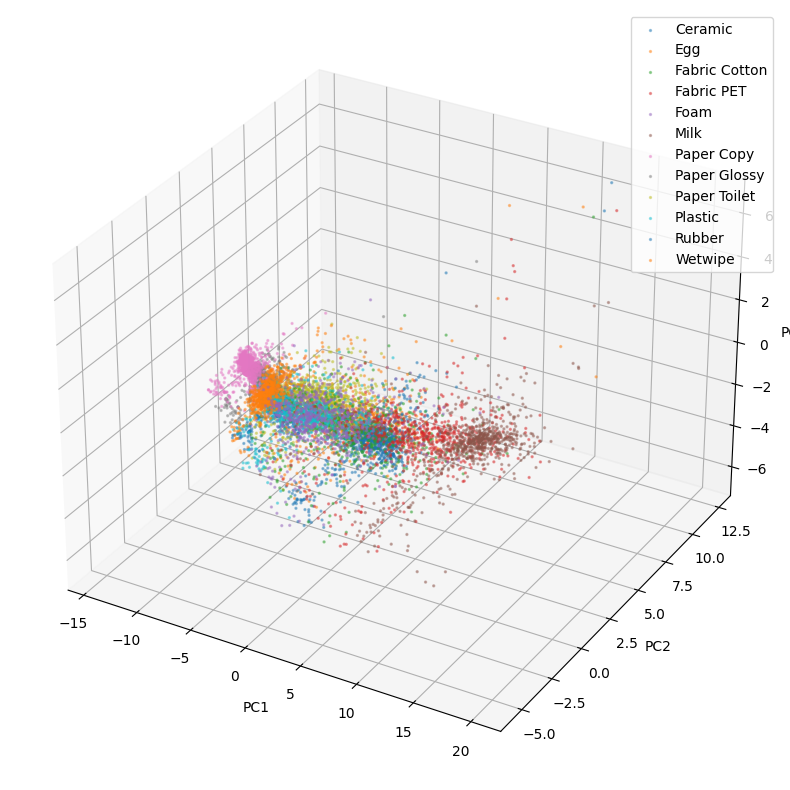

In [3]:
from sklearn import decomposition

data_list = [data_tot_ceramic, data_tot_egg, data_tot_fabric_cotton, data_tot_fabric_PET, data_tot_foam, data_tot_milk,
             data_tot_paper_copy, data_tot_paper_glossy, data_tot_paper_toilet, data_tot_plastic, data_tot_rubber, data_tot_wetwipe]
class_names = ["Ceramic", "Egg", "Fabric Cotton", "Fabric PET", "Foam", "Milk", "Paper Copy", "Paper Glossy", "Paper Toilet", "Plastic", "Rubber", "Wetwipe"]

tot_data = np.vstack(data_list)
print(tot_data.shape)

x = tot_data
pca = decomposition.PCA(n_components=3)
x_std = x
# x_std = StandardScaler().fit_transform(x)
transformed_data = pca.fit_transform(x_std)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data_list)):
    ax.scatter(transformed_data[:len(data_list[i]), 0], transformed_data[:len(data_list[i]), 1], transformed_data[:len(data_list[i]), 2], label=class_names[i], s=2, alpha=0.4)
    transformed_data = transformed_data[len(data_list[i]):]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# ax.set_xlim(-2, 2)
# ax.set_ylim(-3, 3)
# ax.set_zlim(-1, 1)

ax.legend()
plt.show()

## Row sum: Multispectral albedo

In [4]:
folder_path = 'data/prism/whites/5-cross/0409'
tot_n_scan = 10  # tot num of scan = n_scan * n_fold
n_fold = 5

rowSum_data_ceramic_list = []
rowSum_data_egg_list = []
rowSum_data_fabric_cotton_list = []
rowSum_data_fabric_PET_list = []
rowSum_data_foam_list = []
rowSum_data_milk_list = []
rowSum_data_paper_copy_list = []
rowSum_data_paper_glossy_list = []
rowSum_data_paper_toilet_list = []
rowSum_data_plastic_list = []
rowSum_data_rubber_list = []
rowSum_data_wetwipe_list = []

for i in range(tot_n_scan):
    if i < n_fold:
        prefix = '1'
    else:
        prefix = '2'
        i -= n_fold

    rowSum_data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/rowSum_data_ceramic{}_{}.npy'.format(prefix, i + 1))))
    rowSum_data_egg_list.append(np.load(os.path.join(folder_path, 'egg/rowSum_data_egg{}_{}.npy'.format(prefix, i + 1))))
    rowSum_data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/rowSum_data_fabric_cotton{}_{}.npy'.format(prefix, i + 1))))
    rowSum_data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/rowSum_data_fabric_PET{}_{}.npy'.format(prefix, i + 1))))
    rowSum_data_foam_list.append(np.load(os.path.join(folder_path, 'foam/rowSum_data_foam{}_{}.npy'.format(prefix, i + 1))))
    rowSum_data_milk_list.append(np.load(os.path.join(folder_path, 'milk/rowSum_data_milk{}_{}.npy'.format(prefix, i + 1))))
    rowSum_data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/rowSum_data_paper_copy{}_{}.npy'.format(prefix, i + 1))))
    rowSum_data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/rowSum_data_paper_glossy{}_{}.npy'.format(prefix, i + 1))))
    rowSum_data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/rowSum_data_paper_toilet{}_{}.npy'.format(prefix, i + 1))))
    rowSum_data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/rowSum_data_plastic{}_{}.npy'.format(prefix, i + 1))))
    rowSum_data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/rowSum_data_rubber{}_{}.npy'.format(prefix, i + 1))))
    rowSum_data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/rowSum_data_wetwipe{}_{}.npy'.format(prefix, i + 1))))

rowSum_data_tot_ceramic = np.vstack(rowSum_data_ceramic_list)
rowSum_data_tot_egg = np.vstack(rowSum_data_egg_list)
rowSum_data_tot_fabric_cotton = np.vstack(rowSum_data_fabric_cotton_list)
rowSum_data_tot_fabric_PET = np.vstack(rowSum_data_fabric_PET_list)
rowSum_data_tot_foam = np.vstack(rowSum_data_foam_list)
rowSum_data_tot_milk = np.vstack(rowSum_data_milk_list)
rowSum_data_tot_paper_copy = np.vstack(rowSum_data_paper_copy_list)
rowSum_data_tot_paper_glossy = np.vstack(rowSum_data_paper_glossy_list)
rowSum_data_tot_paper_toilet = np.vstack(rowSum_data_paper_toilet_list)
rowSum_data_tot_plastic = np.vstack(rowSum_data_plastic_list)
rowSum_data_tot_rubber = np.vstack(rowSum_data_rubber_list)
rowSum_data_tot_wetwipe = np.vstack(rowSum_data_wetwipe_list)


In [5]:
print(rowSum_data_tot_ceramic.shape)
print(rowSum_data_tot_egg.shape)
print(rowSum_data_tot_fabric_cotton.shape)
print(rowSum_data_tot_fabric_PET.shape)

(769, 80)
(663, 80)
(746, 80)
(710, 80)


(8730, 80)


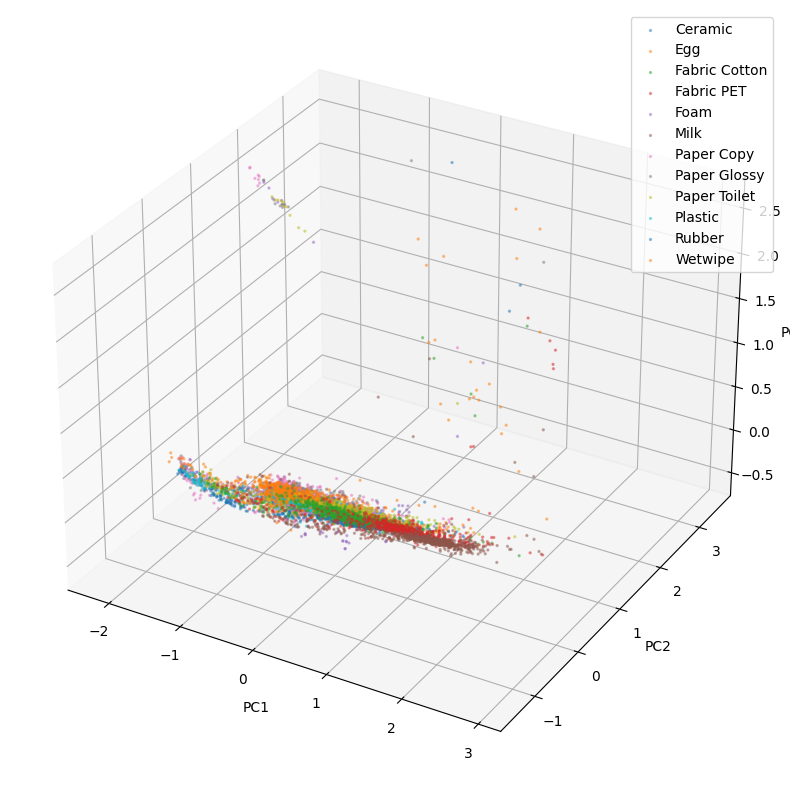

In [6]:
from sklearn import decomposition

data_list = [rowSum_data_tot_ceramic, rowSum_data_tot_egg, rowSum_data_tot_fabric_cotton, rowSum_data_tot_fabric_PET, rowSum_data_tot_foam, rowSum_data_tot_milk,
             rowSum_data_tot_paper_copy, rowSum_data_tot_paper_glossy, rowSum_data_tot_paper_toilet, rowSum_data_tot_plastic, rowSum_data_tot_rubber, rowSum_data_tot_wetwipe]
class_names = ["Ceramic", "Egg", "Fabric Cotton", "Fabric PET", "Foam", "Milk", "Paper Copy", "Paper Glossy", "Paper Toilet", "Plastic", "Rubber", "Wetwipe"]

tot_data = np.vstack(data_list)
print(tot_data.shape)

x = tot_data
pca = decomposition.PCA(n_components=3)
x_std = x
# x_std = StandardScaler().fit_transform(x)
transformed_data = pca.fit_transform(x_std)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data_list)):
    ax.scatter(transformed_data[:len(data_list[i]), 0], transformed_data[:len(data_list[i]), 1], transformed_data[:len(data_list[i]), 2], label=class_names[i], s=2, alpha=0.4)
    transformed_data = transformed_data[len(data_list[i]):]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# ax.set_xlim(-2, 2)
# ax.set_ylim(-3, 3)
# ax.set_zlim(-1, 1)

ax.legend()
plt.show()

## Column sum: Achromatic scattering

In [16]:
colSum_data_ceramic_list = []
colSum_data_egg_list = []
colSum_data_fabric_cotton_list = []
colSum_data_fabric_PET_list = []
colSum_data_foam_list = []
colSum_data_milk_list = []
colSum_data_paper_copy_list = []
colSum_data_paper_glossy_list = []
colSum_data_paper_toilet_list = []
colSum_data_plastic_list = []
colSum_data_rubber_list = []
colSum_data_wetwipe_list = []

for i in range(tot_n_scan):
    if i < n_fold:
        prefix = '1'
    else:
        prefix = '2'
        i -= n_fold

    colSum_data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/colSum_data_ceramic{}_{}.npy'.format(prefix, i + 1))))
    colSum_data_egg_list.append(np.load(os.path.join(folder_path, 'egg/colSum_data_egg{}_{}.npy'.format(prefix, i + 1))))
    colSum_data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/colSum_data_fabric_cotton{}_{}.npy'.format(prefix, i + 1))))
    colSum_data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/colSum_data_fabric_PET{}_{}.npy'.format(prefix, i + 1))))
    colSum_data_foam_list.append(np.load(os.path.join(folder_path, 'foam/colSum_data_foam{}_{}.npy'.format(prefix, i + 1))))
    colSum_data_milk_list.append(np.load(os.path.join(folder_path, 'milk/colSum_data_milk{}_{}.npy'.format(prefix, i + 1))))
    colSum_data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/colSum_data_paper_copy{}_{}.npy'.format(prefix, i + 1))))
    colSum_data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/colSum_data_paper_glossy{}_{}.npy'.format(prefix, i + 1))))
    colSum_data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/colSum_data_paper_toilet{}_{}.npy'.format(prefix, i + 1))))
    colSum_data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/colSum_data_plastic{}_{}.npy'.format(prefix, i + 1))))
    colSum_data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/colSum_data_rubber{}_{}.npy'.format(prefix, i + 1))))
    colSum_data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/colSum_data_wetwipe{}_{}.npy'.format(prefix, i + 1))))

colSum_data_tot_ceramic = np.vstack(colSum_data_ceramic_list)
colSum_data_tot_egg = np.vstack(colSum_data_egg_list)
colSum_data_tot_fabric_cotton = np.vstack(colSum_data_fabric_cotton_list)
colSum_data_tot_fabric_PET = np.vstack(colSum_data_fabric_PET_list)
colSum_data_tot_foam = np.vstack(colSum_data_foam_list)
colSum_data_tot_milk = np.vstack(colSum_data_milk_list)
colSum_data_tot_paper_copy = np.vstack(colSum_data_paper_copy_list)
colSum_data_tot_paper_glossy = np.vstack(colSum_data_paper_glossy_list)
colSum_data_tot_paper_toilet = np.vstack(colSum_data_paper_toilet_list)
colSum_data_tot_plastic = np.vstack(colSum_data_plastic_list)
colSum_data_tot_rubber = np.vstack(colSum_data_rubber_list)
colSum_data_tot_wetwipe = np.vstack(colSum_data_wetwipe_list)


In [18]:
print(colSum_data_tot_ceramic.shape)
print(colSum_data_tot_egg.shape)
print(colSum_data_tot_fabric_cotton.shape)
print(colSum_data_tot_fabric_PET.shape)
print(colSum_data_tot_foam.shape)
print(colSum_data_tot_milk.shape)
print(colSum_data_tot_paper_copy.shape)
print(colSum_data_tot_paper_glossy.shape)
print(colSum_data_tot_paper_toilet.shape)
print(colSum_data_tot_plastic.shape)
print(colSum_data_tot_rubber.shape)
print(colSum_data_tot_wetwipe.shape)

(769, 30)
(663, 30)
(746, 30)
(710, 30)
(693, 30)
(727, 30)
(818, 30)
(724, 30)
(722, 30)
(785, 30)
(638, 30)
(735, 30)


(8730, 30)


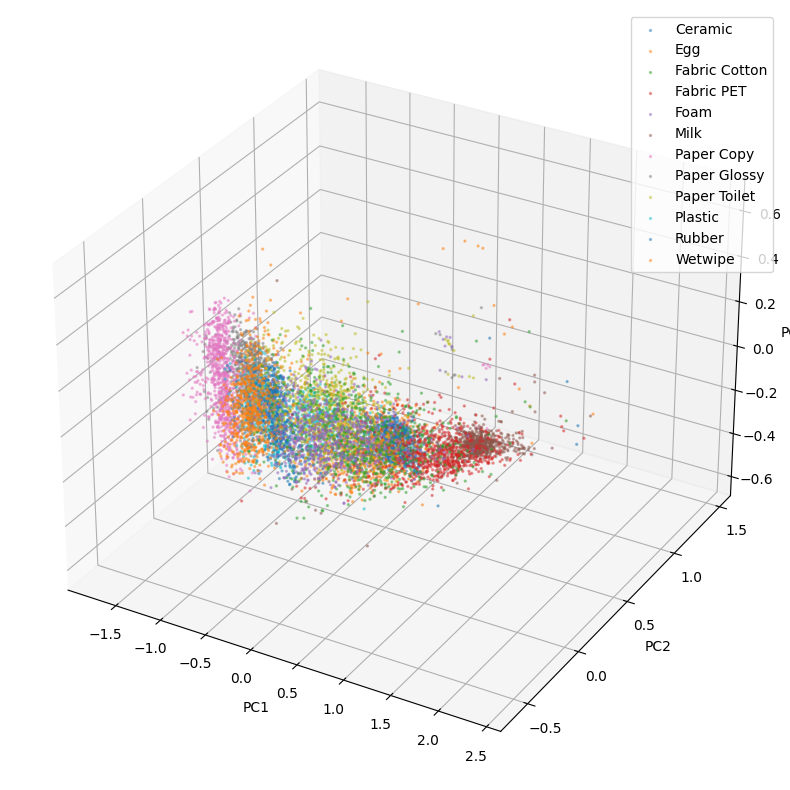

In [19]:
from sklearn import decomposition

data_list = [colSum_data_tot_ceramic, colSum_data_tot_egg, colSum_data_tot_fabric_cotton, colSum_data_tot_fabric_PET, colSum_data_tot_foam, colSum_data_tot_milk,
             colSum_data_tot_paper_copy, colSum_data_tot_paper_glossy, colSum_data_tot_paper_toilet, colSum_data_tot_plastic, colSum_data_tot_rubber, colSum_data_tot_wetwipe]
class_names = ["Ceramic", "Egg", "Fabric Cotton", "Fabric PET", "Foam", "Milk", "Paper Copy", "Paper Glossy", "Paper Toilet", "Plastic", "Rubber", "Wetwipe"]

tot_data = np.vstack(data_list)
print(tot_data.shape)

x = tot_data
pca = decomposition.PCA(n_components=3)
x_std = x
# x_std = StandardScaler().fit_transform(x)
transformed_data = pca.fit_transform(x_std)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data_list)):
    ax.scatter(transformed_data[:len(data_list[i]), 0], transformed_data[:len(data_list[i]), 1], transformed_data[:len(data_list[i]), 2], label=class_names[i], s=2, alpha=0.4)
    transformed_data = transformed_data[len(data_list[i]):]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# ax.set_xlim(-2, 2)
# ax.set_ylim(-3, 3)
# ax.set_zlim(-1, 1)

ax.legend()
plt.show()

## Left and right half patch (shorter vs. longer wavelength)

In [6]:
folder_path = 'data/prism/whites/5-cross/0409'
tot_n_scan = 10 # tot num of scan = n_scan * n_fold
n_fold = 5

left_data_ceramic_list = []
left_data_egg_list = []
left_data_fabric_cotton_list = []
left_data_fabric_PET_list = []
left_data_foam_list = []
left_data_milk_list = []
left_data_paper_copy_list = []
left_data_paper_glossy_list = []
left_data_paper_toilet_list = []
left_data_plastic_list = []
left_data_rubber_list = []
left_data_wetwipe_list = []

right_data_ceramic_list = []
right_data_egg_list = []
right_data_fabric_cotton_list = []
right_data_fabric_PET_list = []
right_data_foam_list = []
right_data_milk_list = []
right_data_paper_copy_list = []
right_data_paper_glossy_list = []
right_data_paper_toilet_list = []
right_data_plastic_list = []
right_data_rubber_list = []
right_data_wetwipe_list = []

for i in range(tot_n_scan):
    if i < n_fold:
        prefix = '1'
    else:
        prefix = '2'
        i -= n_fold

    left_data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/left_data_ceramic{}_{}.npy'.format(prefix, i + 1))))
    left_data_egg_list.append(np.load(os.path.join(folder_path, 'egg/left_data_egg{}_{}.npy'.format(prefix, i + 1))))
    left_data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/left_data_fabric_cotton{}_{}.npy'.format(prefix, i + 1))))
    left_data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/left_data_fabric_PET{}_{}.npy'.format(prefix, i + 1))))
    left_data_foam_list.append(np.load(os.path.join(folder_path, 'foam/left_data_foam{}_{}.npy'.format(prefix, i + 1))))
    left_data_milk_list.append(np.load(os.path.join(folder_path, 'milk/left_data_milk{}_{}.npy'.format(prefix, i + 1))))
    left_data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/left_data_paper_copy{}_{}.npy'.format(prefix, i + 1))))
    left_data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/left_data_paper_glossy{}_{}.npy'.format(prefix, i + 1))))
    left_data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/left_data_paper_toilet{}_{}.npy'.format(prefix, i + 1))))
    left_data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/left_data_plastic{}_{}.npy'.format(prefix, i + 1))))
    left_data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/left_data_rubber{}_{}.npy'.format(prefix, i + 1))))
    left_data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/left_data_wetwipe{}_{}.npy'.format(prefix, i + 1))))

    right_data_ceramic_list.append(np.load(os.path.join(folder_path, 'ceramic/right_data_ceramic{}_{}.npy'.format(prefix, i + 1))))
    right_data_egg_list.append(np.load(os.path.join(folder_path, 'egg/right_data_egg{}_{}.npy'.format(prefix, i + 1))))
    right_data_fabric_cotton_list.append(np.load(os.path.join(folder_path, 'fabric_cotton/right_data_fabric_cotton{}_{}.npy'.format(prefix, i + 1))))
    right_data_fabric_PET_list.append(np.load(os.path.join(folder_path, 'fabric_PET/right_data_fabric_PET{}_{}.npy'.format(prefix, i + 1))))
    right_data_foam_list.append(np.load(os.path.join(folder_path, 'foam/right_data_foam{}_{}.npy'.format(prefix, i + 1))))
    right_data_milk_list.append(np.load(os.path.join(folder_path, 'milk/right_data_milk{}_{}.npy'.format(prefix, i + 1))))
    right_data_paper_copy_list.append(np.load(os.path.join(folder_path, 'paper_copy/right_data_paper_copy{}_{}.npy'.format(prefix, i + 1))))
    right_data_paper_glossy_list.append(np.load(os.path.join(folder_path, 'paper_glossy/right_data_paper_glossy{}_{}.npy'.format(prefix, i + 1))))
    right_data_paper_toilet_list.append(np.load(os.path.join(folder_path, 'paper_toilet/right_data_paper_toilet{}_{}.npy'.format(prefix, i + 1))))
    right_data_plastic_list.append(np.load(os.path.join(folder_path, 'plastic/right_data_plastic{}_{}.npy'.format(prefix, i + 1))))
    right_data_rubber_list.append(np.load(os.path.join(folder_path, 'rubber/right_data_rubber{}_{}.npy'.format(prefix, i + 1))))
    right_data_wetwipe_list.append(np.load(os.path.join(folder_path, 'wetwipe/right_data_wetwipe{}_{}.npy'.format(prefix, i + 1))))

left_data_tot_ceramic = np.vstack(left_data_ceramic_list)
left_data_tot_egg = np.vstack(left_data_egg_list)
left_data_tot_fabric_cotton = np.vstack(left_data_fabric_cotton_list)
left_data_tot_fabric_PET = np.vstack(left_data_fabric_PET_list)
left_data_tot_foam = np.vstack(left_data_foam_list)
left_data_tot_milk = np.vstack(left_data_milk_list)
left_data_tot_paper_copy = np.vstack(left_data_paper_copy_list)
left_data_tot_paper_glossy = np.vstack(left_data_paper_glossy_list)
left_data_tot_paper_toilet = np.vstack(left_data_paper_toilet_list)
left_data_tot_plastic = np.vstack(left_data_plastic_list)
left_data_tot_rubber = np.vstack(left_data_rubber_list)
left_data_tot_wetwipe = np.vstack(left_data_wetwipe_list)

right_data_tot_ceramic = np.vstack(right_data_ceramic_list)
right_data_tot_egg = np.vstack(right_data_egg_list)
right_data_tot_fabric_cotton = np.vstack(right_data_fabric_cotton_list)
right_data_tot_fabric_PET = np.vstack(right_data_fabric_PET_list)
right_data_tot_foam = np.vstack(right_data_foam_list)
right_data_tot_milk = np.vstack(right_data_milk_list)
right_data_tot_paper_copy = np.vstack(right_data_paper_copy_list)
right_data_tot_paper_glossy = np.vstack(right_data_paper_glossy_list)
right_data_tot_paper_toilet = np.vstack(right_data_paper_toilet_list)
right_data_tot_plastic = np.vstack(right_data_plastic_list)
right_data_tot_rubber = np.vstack(right_data_rubber_list)
right_data_tot_wetwipe = np.vstack(right_data_wetwipe_list)


(8730, 1200)


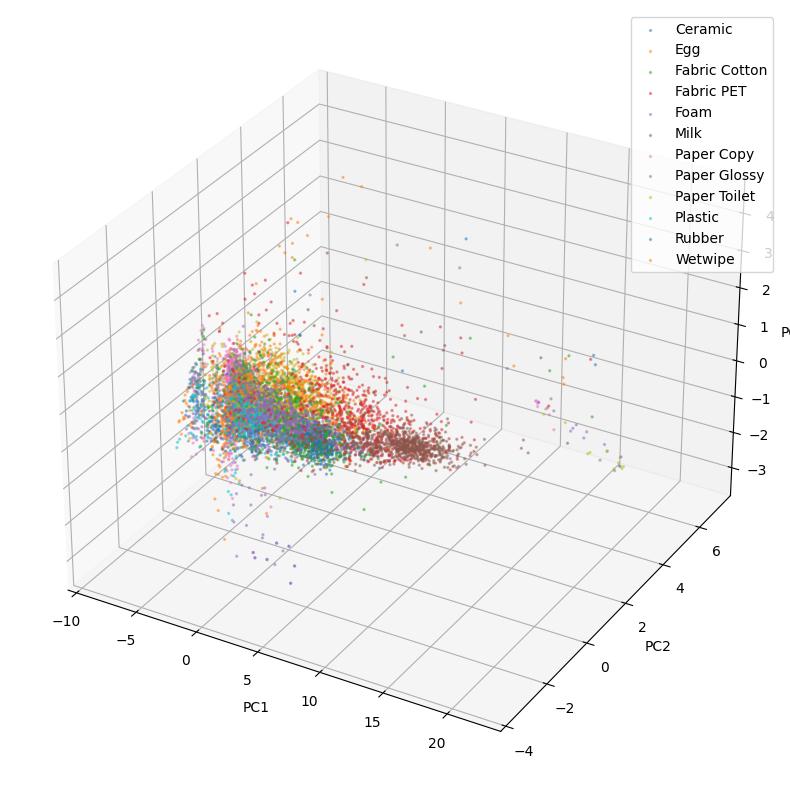

In [7]:
from sklearn import decomposition

data_list = [left_data_tot_ceramic, left_data_tot_egg, left_data_tot_fabric_cotton, left_data_tot_fabric_PET, left_data_tot_foam, left_data_tot_milk,
             left_data_tot_paper_copy, left_data_tot_paper_glossy, left_data_tot_paper_toilet, left_data_tot_plastic, left_data_tot_rubber, left_data_tot_wetwipe]
class_names = ["Ceramic", "Egg", "Fabric Cotton", "Fabric PET", "Foam", "Milk", "Paper Copy", "Paper Glossy", "Paper Toilet", "Plastic", "Rubber", "Wetwipe"]

tot_data = np.vstack(data_list)
print(tot_data.shape)

x = tot_data
pca = decomposition.PCA(n_components=3)
x_std = x
# x_std = StandardScaler().fit_transform(x)
transformed_data = pca.fit_transform(x_std)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data_list)):
    ax.scatter(transformed_data[:len(data_list[i]), 0], transformed_data[:len(data_list[i]), 1], transformed_data[:len(data_list[i]), 2], label=class_names[i], s=2, alpha=0.4)
    transformed_data = transformed_data[len(data_list[i]):]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# ax.set_xlim(-2, 2)
# ax.set_ylim(-3, 3)
# ax.set_zlim(-1, 1)

ax.legend()
plt.show()

(8730, 1200)


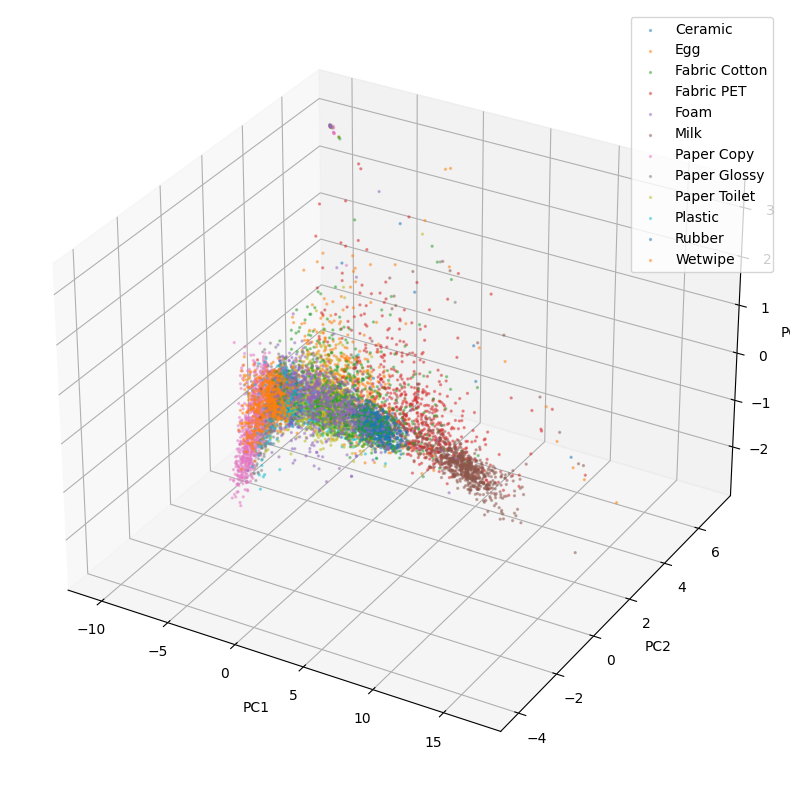

In [8]:
from sklearn import decomposition

data_list = [right_data_tot_ceramic, right_data_tot_egg, right_data_tot_fabric_cotton, right_data_tot_fabric_PET, right_data_tot_foam, right_data_tot_milk,
             right_data_tot_paper_copy, right_data_tot_paper_glossy, right_data_tot_paper_toilet, right_data_tot_plastic, right_data_tot_rubber, right_data_tot_wetwipe]
class_names = ["Ceramic", "Egg", "Fabric Cotton", "Fabric PET", "Foam", "Milk", "Paper Copy", "Paper Glossy", "Paper Toilet", "Plastic", "Rubber", "Wetwipe"]

tot_data = np.vstack(data_list)
print(tot_data.shape)

x = tot_data
pca = decomposition.PCA(n_components=3)
x_std = x
# x_std = StandardScaler().fit_transform(x)
transformed_data = pca.fit_transform(x_std)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data_list)):
    ax.scatter(transformed_data[:len(data_list[i]), 0], transformed_data[:len(data_list[i]), 1], transformed_data[:len(data_list[i]), 2], label=class_names[i], s=2, alpha=0.4)
    transformed_data = transformed_data[len(data_list[i]):]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# ax.set_xlim(-2, 2)
# ax.set_ylim(-3, 3)
# ax.set_zlim(-1, 1)

ax.legend()
plt.show()

# 5-cross validation

## Multispectral albedo (row sum)

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [rowSum_data_ceramic_list, rowSum_data_egg_list, rowSum_data_fabric_cotton_list, rowSum_data_fabric_PET_list,
                    rowSum_data_foam_list, rowSum_data_milk_list, rowSum_data_paper_copy_list, rowSum_data_paper_glossy_list,
                    rowSum_data_paper_toilet_list, rowSum_data_plastic_list, rowSum_data_rubber_list, rowSum_data_wetwipe_list]

for i in range(5):
    test_indices = [i, i + 5]
    train_indices = [j for j in range(10) if j not in test_indices]

    X_test = np.concatenate([data_list[idx] for data_list in class_data_lists for idx in test_indices])
    y_test = np.concatenate([np.full(data_list[idx].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists) for idx in test_indices])

    X_train_list = []
    y_train_list = []

    for class_idx, data_list in enumerate(class_data_lists):
        rest_data = np.vstack([data_list[idx] for idx in train_indices])
        X_train_list.append(rest_data)
        y_train_list.append(np.full(rest_data.shape[0], class_idx))

    X_train = np.concatenate(X_train_list)
    y_train = np.concatenate(y_train_list)

    # Fit the LDA model to the training data
    lda.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = lda.predict(X_test)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [23]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.465446597866927


[0.47670454545454544,
 0.5229681978798587,
 0.42105263157894735,
 0.46267806267806266,
 0.4438295517432208]

In [22]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.44960185427905985


[0.4375, 0.5, 0.43216374269005847, 0.4455840455840456, 0.43276148312119533]

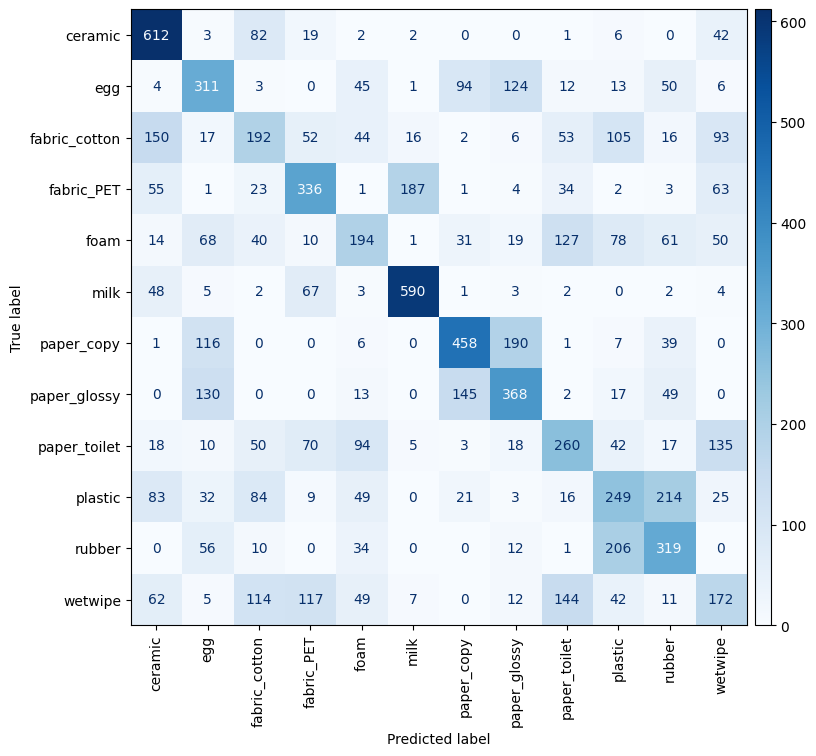

In [24]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

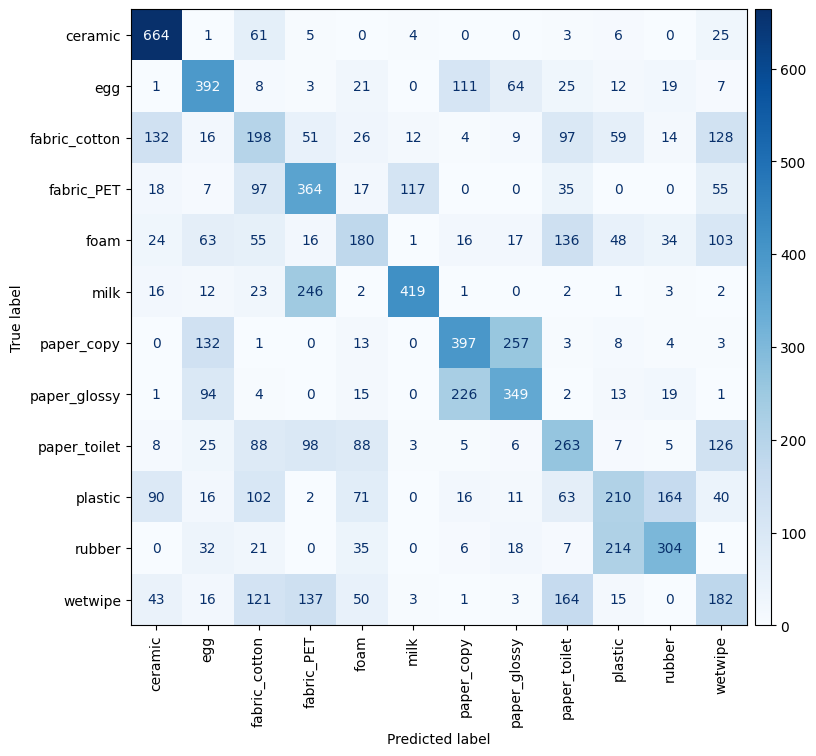

In [25]:
cm = sum(SVM_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

In [ ]:
cm = LDA_cm_list[0]
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

## Achromatic scattering (col sum)

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [colSum_data_ceramic_list, colSum_data_egg_list, colSum_data_fabric_cotton_list, colSum_data_fabric_PET_list,
                    colSum_data_foam_list, colSum_data_milk_list, colSum_data_paper_copy_list, colSum_data_paper_glossy_list,
                    colSum_data_paper_toilet_list, colSum_data_plastic_list, colSum_data_rubber_list, colSum_data_wetwipe_list]

for i in range(5):
    test_indices = [i, i + 5]
    train_indices = [j for j in range(10) if j not in test_indices]

    X_test = np.concatenate([data_list[idx] for data_list in class_data_lists for idx in test_indices])
    y_test = np.concatenate([np.full(data_list[idx].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists) for idx in test_indices])

    X_train_list = []
    y_train_list = []

    for class_idx, data_list in enumerate(class_data_lists):
        rest_data = np.vstack([data_list[idx] for idx in train_indices])
        X_train_list.append(rest_data)
        y_train_list.append(np.full(rest_data.shape[0], class_idx))

    X_train = np.concatenate(X_train_list)
    y_train = np.concatenate(y_train_list)

    # Fit the LDA model to the training data
    lda.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = lda.predict(X_test)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [54]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.6051966014988591


[0.5926136363636364,
 0.6648998822143698,
 0.6029239766081871,
 0.5988603988603989,
 0.5666851134477033]

In [55]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.6125614975314836


[0.6079545454545454,
 0.6095406360424028,
 0.6192982456140351,
 0.603988603988604,
 0.6220254565578307]

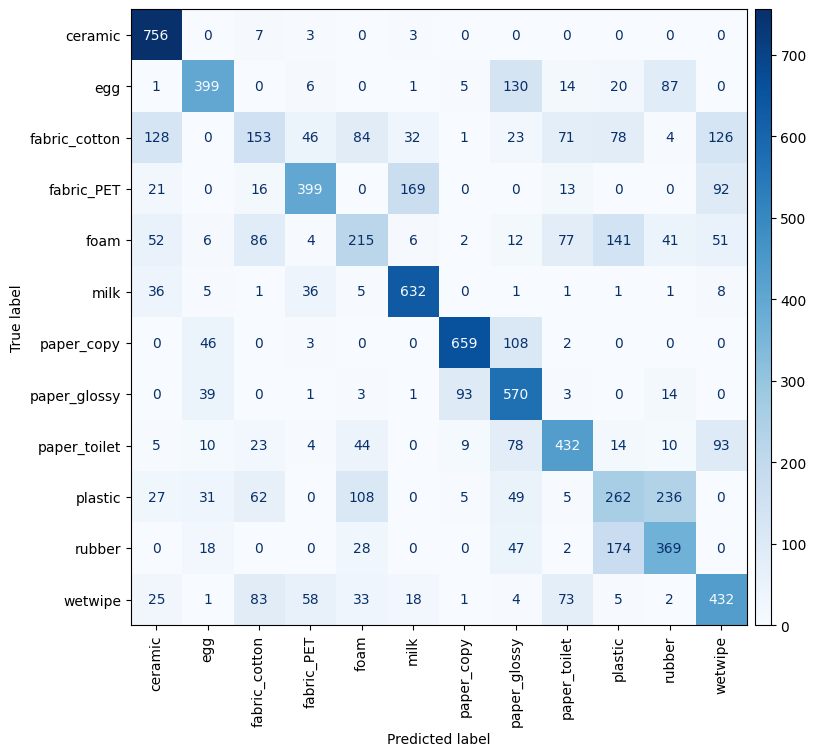

In [56]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

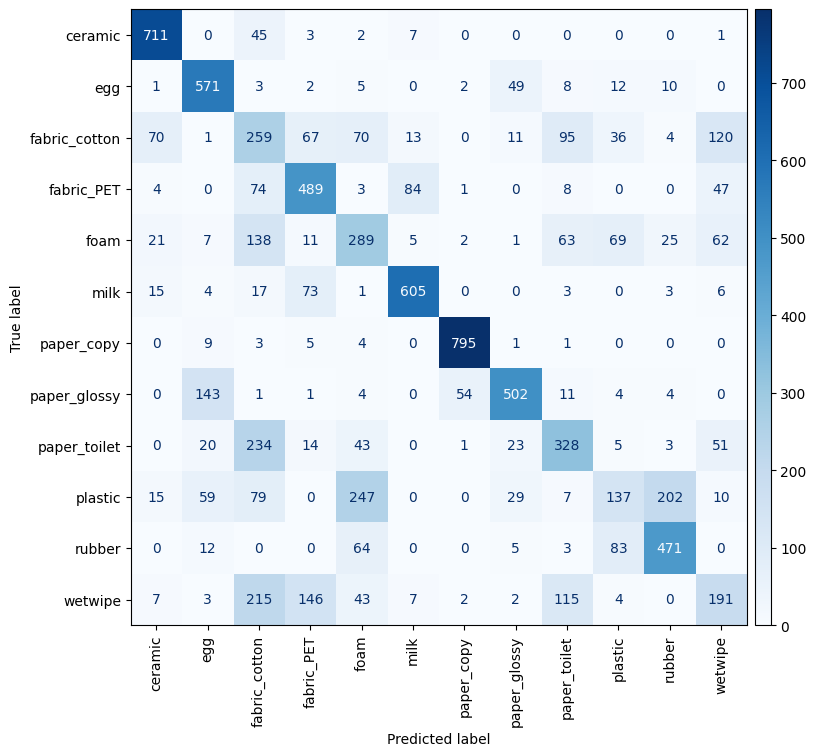

In [57]:
cm = sum(SVM_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

In [ ]:
cm = LDA_cm_list[0]
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

## Spectral Subsurface Scattering (Multispectral Point Patches, Max Normalized)

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [data_ceramic_list, data_egg_list, data_fabric_cotton_list, data_fabric_PET_list,
                    data_foam_list, data_milk_list, data_paper_copy_list, data_paper_glossy_list,
                    data_paper_toilet_list, data_plastic_list, data_rubber_list, data_wetwipe_list]

for i in range(5):
    test_indices = [i, i + 5]
    train_indices = [j for j in range(10) if j not in test_indices]

    X_test = np.concatenate([data_list[idx] for data_list in class_data_lists for idx in test_indices])
    y_test = np.concatenate([np.full(data_list[idx].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists) for idx in test_indices])

    X_train_list = []
    y_train_list = []

    for class_idx, data_list in enumerate(class_data_lists):
        rest_data = np.vstack([data_list[idx] for idx in train_indices])
        X_train_list.append(rest_data)
        y_train_list.append(np.full(rest_data.shape[0], class_idx))

    X_train = np.concatenate(X_train_list)
    y_train = np.concatenate(y_train_list)

    # Fit the LDA model to the training data
    lda.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = lda.predict(X_test)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [6]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.5668573212511472


[0.56875,
 0.5936395759717314,
 0.5830409356725146,
 0.5492877492877493,
 0.539568345323741]

In [7]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.8063111487731287


[0.8221590909090909,
 0.856301531213192,
 0.7695906432748538,
 0.796011396011396,
 0.7874930824571112]

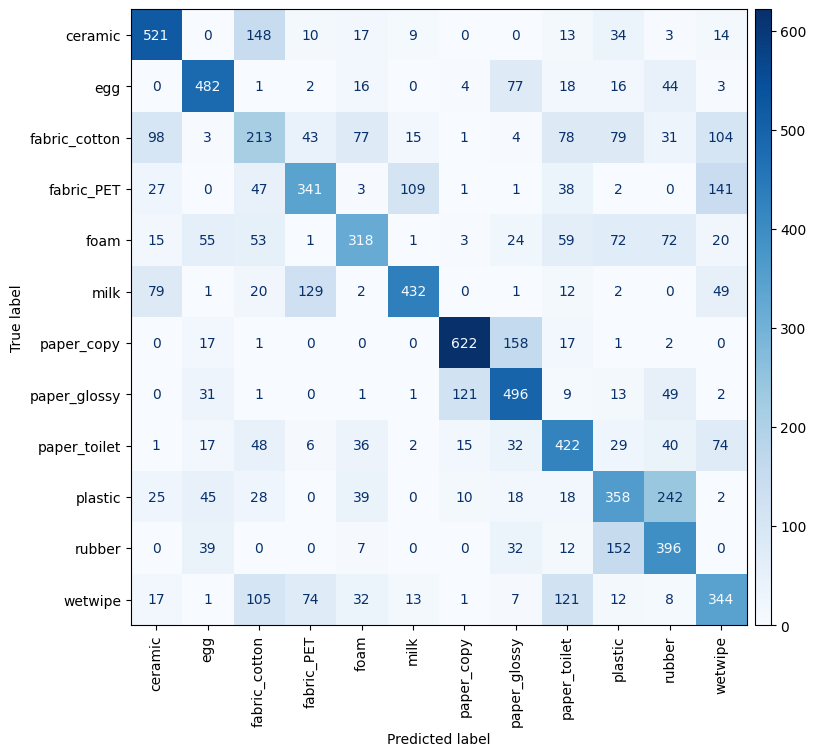

In [9]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

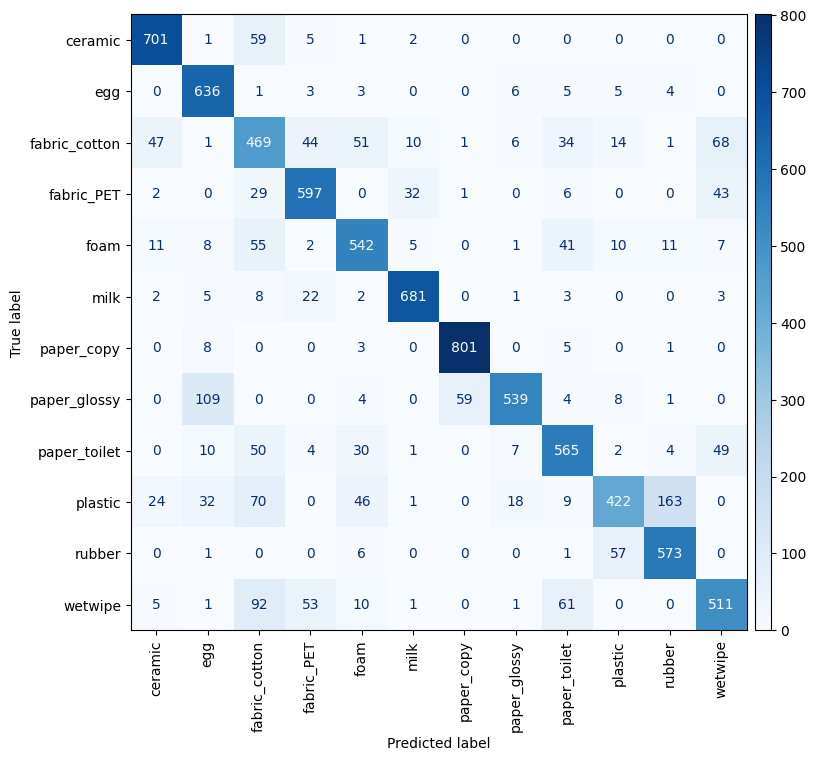

In [10]:
cm = sum(SVM_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

In [ ]:
cm = LDA_cm_list[0]
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

## Left half (shorter wavelength)

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [left_data_ceramic_list, left_data_egg_list, left_data_fabric_cotton_list, left_data_fabric_PET_list,
                    left_data_foam_list, left_data_milk_list, left_data_paper_copy_list, left_data_paper_glossy_list,
                    left_data_paper_toilet_list, left_data_plastic_list, left_data_rubber_list, left_data_wetwipe_list]

for i in range(5):
    test_indices = [i, i + 5]
    train_indices = [j for j in range(10) if j not in test_indices]

    X_test = np.concatenate([data_list[idx] for data_list in class_data_lists for idx in test_indices])
    y_test = np.concatenate([np.full(data_list[idx].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists) for idx in test_indices])

    X_train_list = []
    y_train_list = []

    for class_idx, data_list in enumerate(class_data_lists):
        rest_data = np.vstack([data_list[idx] for idx in train_indices])
        X_train_list.append(rest_data)
        y_train_list.append(np.full(rest_data.shape[0], class_idx))

    X_train = np.concatenate(X_train_list)
    y_train = np.concatenate(y_train_list)

    # Fit the LDA model to the training data
    lda.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = lda.predict(X_test)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [10]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.5550475628363529


[0.5431818181818182,
 0.591283863368669,
 0.5672514619883041,
 0.5356125356125356,
 0.5379081350304372]

In [11]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.7581336560965907


[0.7585227272727273,
 0.8056537102473498,
 0.7187134502923976,
 0.7606837606837606,
 0.7470946319867183]

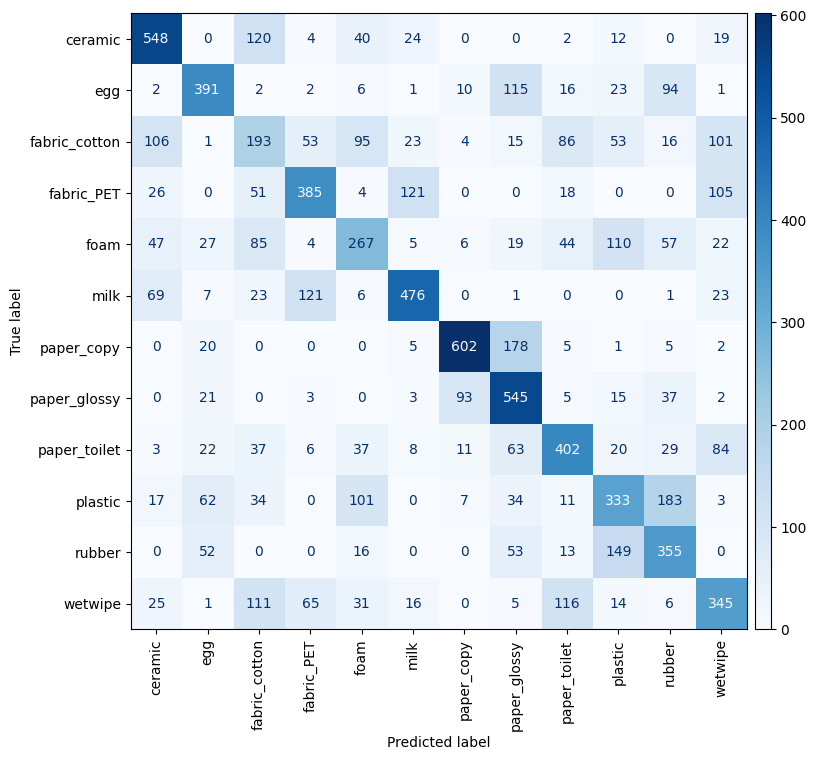

In [12]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

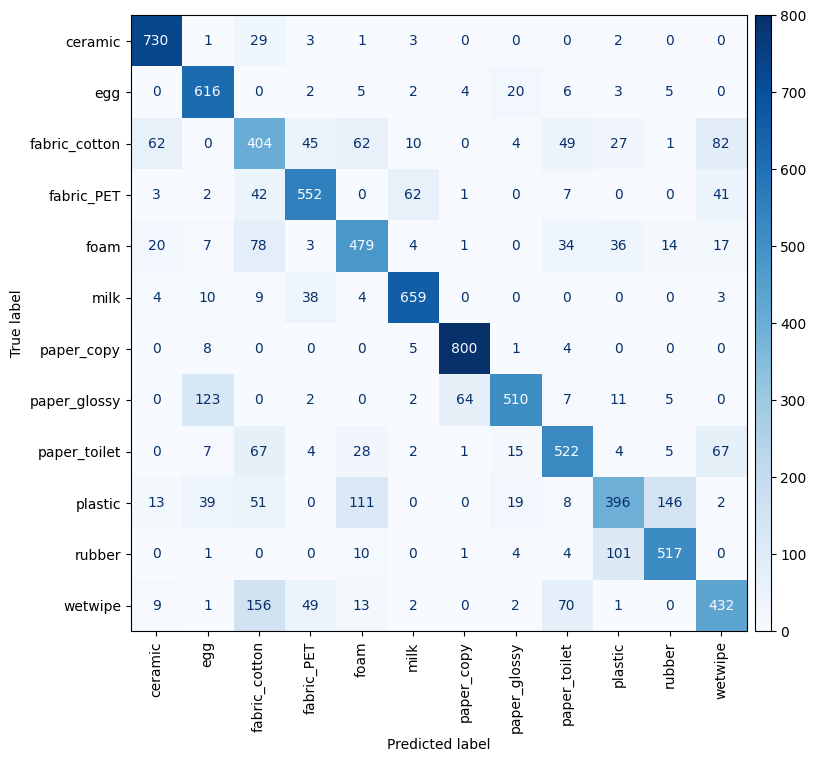

In [13]:
cm = sum(SVM_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

## Right half (shorter wavelength)

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [right_data_ceramic_list, right_data_egg_list, right_data_fabric_cotton_list, right_data_fabric_PET_list,
                    right_data_foam_list, right_data_milk_list, right_data_paper_copy_list, right_data_paper_glossy_list,
                    right_data_paper_toilet_list, right_data_plastic_list, right_data_rubber_list, right_data_wetwipe_list]

for i in range(5):
    test_indices = [i, i + 5]
    train_indices = [j for j in range(10) if j not in test_indices]

    X_test = np.concatenate([data_list[idx] for data_list in class_data_lists for idx in test_indices])
    y_test = np.concatenate([np.full(data_list[idx].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists) for idx in test_indices])

    X_train_list = []
    y_train_list = []

    for class_idx, data_list in enumerate(class_data_lists):
        rest_data = np.vstack([data_list[idx] for idx in train_indices])
        X_train_list.append(rest_data)
        y_train_list.append(np.full(rest_data.shape[0], class_idx))

    X_train = np.concatenate(X_train_list)
    y_train = np.concatenate(y_train_list)

    # Fit the LDA model to the training data
    lda.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = lda.predict(X_test)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [15]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.6065003792322605


[0.6153409090909091,
 0.6454652532391049,
 0.6011695906432749,
 0.5988603988603989,
 0.5716657443276149]

In [16]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.7738926070719276


[0.8164772727272728,
 0.8091872791519434,
 0.7497076023391813,
 0.7658119658119659,
 0.728278915329275]

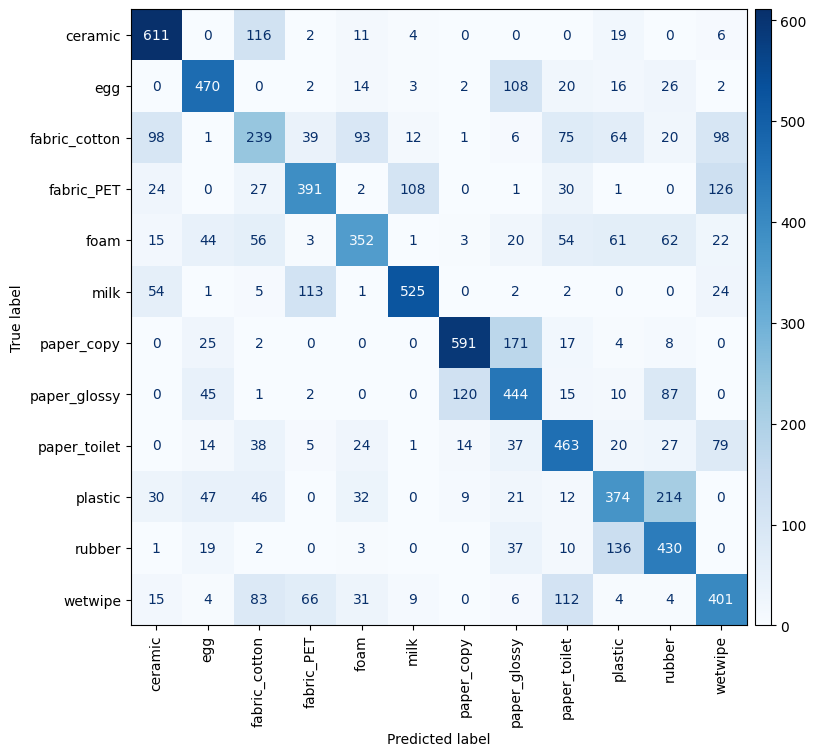

In [17]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

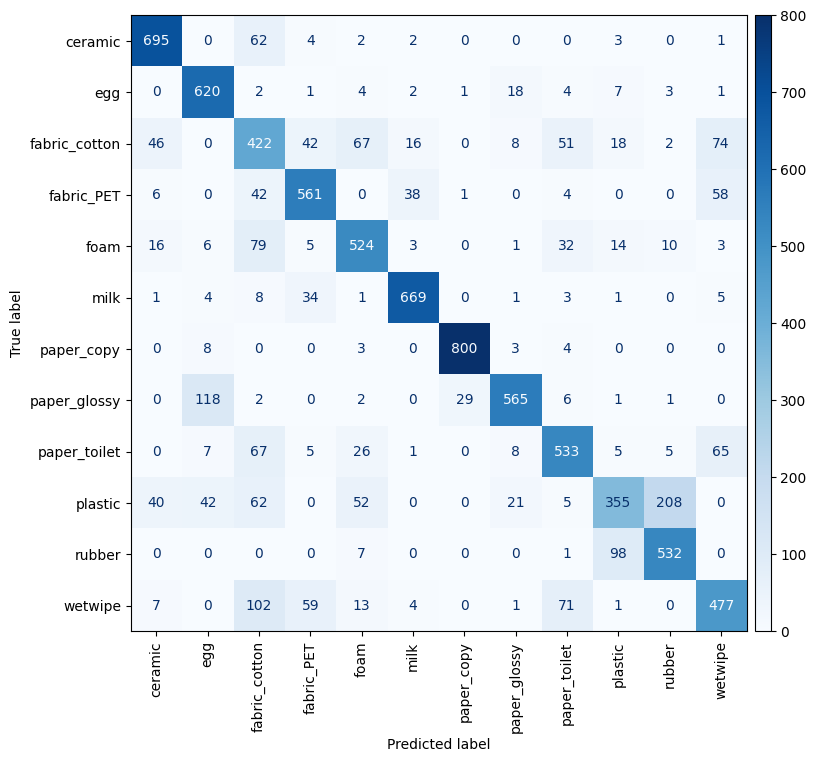

In [18]:
cm = sum(SVM_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

# Train on scan1 and test on scan2

## Train on whole scan 1 and test on whole scan2

In [4]:
import numpy as np

# Prepare training dataset
train_data = [data_ceramic_list[0:5], data_egg_list[0:5], data_fabric_cotton_list[0:5], data_fabric_PET_list[0:5],
              data_foam_list[0:5], data_milk_list[0:5], data_paper_copy_list[0:5], data_paper_glossy_list[0:5],
              data_paper_toilet_list[0:5], data_plastic_list[0:5], data_rubber_list[0:5], data_wetwipe_list[0:5]]
X_train = np.concatenate([np.concatenate(data) for data in train_data])

# Prepare testing dataset
test_data = [data_ceramic_list[5:], data_egg_list[5:], data_fabric_cotton_list[5:], data_fabric_PET_list[5:],
             data_foam_list[5:], data_milk_list[5:], data_paper_copy_list[5:], data_paper_glossy_list[5:],
             data_paper_toilet_list[5:], data_plastic_list[5:], data_rubber_list[5:], data_wetwipe_list[5:]]
X_test = np.concatenate([np.concatenate(data) for data in test_data])

# Prepare training labels
train_labels = [np.full(sum([arr.shape[0] for arr in data]), i) for i, data in enumerate(train_data)]
y_train = np.concatenate(train_labels)

# Prepare testing labels
test_labels = [np.full(sum([arr.shape[0] for arr in data]), i) for i, data in enumerate(test_data)]
y_test = np.concatenate(test_labels)


In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4400, 2400)
(4400,)
(4330, 2400)
(4330,)


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import NuSVC

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05) # A large nu value results in fewer support vectors and therefore a faster classification process, but it may result in a lower accuracy

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Perform classification on the test data
predictions = lda.predict(X_test)

# Measure the accuracy on the test data
accuracy = accuracy_score(y_test, predictions)
LDA_accuracy_list.append(accuracy)
# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)
LDA_cm_list.append(cm)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Perform classification on the test data
predictions = clf.predict(X_test)
# Measure the accuracy on the test data
accuracy = accuracy_score(y_test, predictions)
SVM_accuracy_list.append(accuracy)
# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)
SVM_cm_list.append(cm)


In [19]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.46997690531177827


[0.46997690531177827]

In [9]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.8011547344110854


[0.8011547344110854]

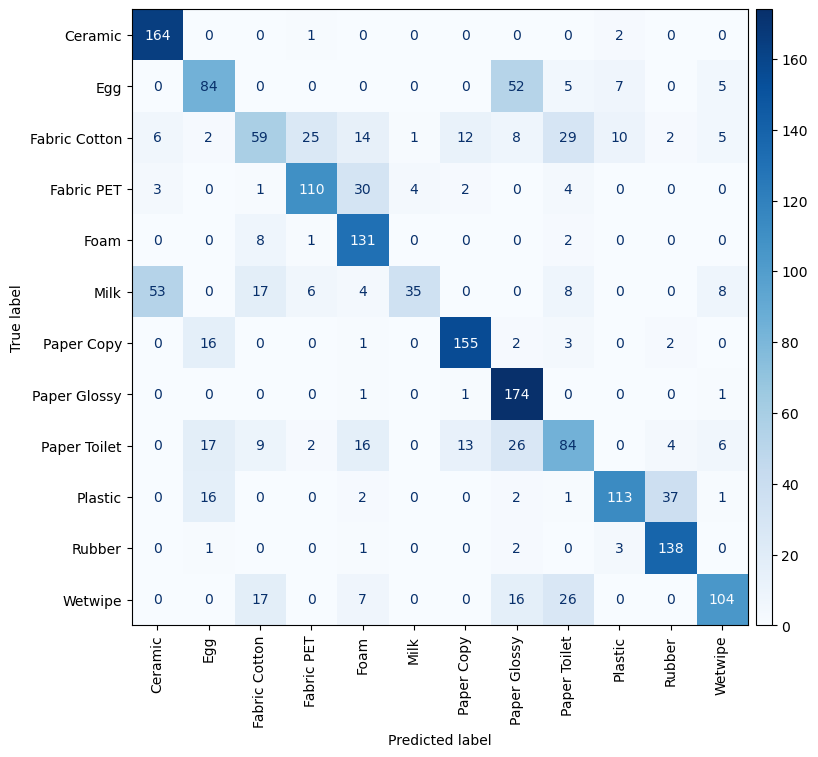

In [ ]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

## Train and test on each fold in different scan group

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = NuSVC(kernel='rbf', nu=0.05)

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [data_ceramic_list, data_egg_list, data_fabric_cotton_list, data_fabric_PET_list,
                    data_foam_list, data_milk_list, data_paper_copy_list, data_paper_glossy_list,
                    data_paper_toilet_list, data_plastic_list, data_rubber_list, data_wetwipe_list]

for i in range(5):
# for i in range(5, 10):
    fold_gap = 1
    X_test = np.concatenate([data_list[i+fold_gap] for data_list in class_data_lists])
    y_test = np.concatenate([np.full(data_list[i+fold_gap].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists)])

    # X_train_list = []
    # y_train_list = []

    # for class_idx, data_list in enumerate(class_data_lists):
    #     rest_data = np.vstack(data_list[:i] + data_list[i+1:])
    #     X_train_list.append(rest_data)
    #     y_train_list.append(np.full(rest_data.shape[0], class_idx))

    # X_train = np.concatenate(X_train_list)
    # y_train = np.concatenate(y_train_list)

    X_train = np.concatenate([data_list[i] for data_list in class_data_lists])
    y_train = np.concatenate([np.full(data_list[i].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists)])

    # Fit the LDA model to the training data
    lda.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = lda.predict(X_test)

    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    LDA_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    LDA_cm_list.append(cm)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)


In [68]:
print("LDA accuracy: ", np.mean(LDA_accuracy_list))
LDA_accuracy_list

LDA accuracy:  0.5257721459602326


[0.5776255707762558,
 0.5155709342560554,
 0.5054021608643458,
 0.5263774912075029,
 0.5038845726970034]

In [69]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.629869581904718


[0.7123287671232876,
 0.6032295271049596,
 0.6290516206482593,
 0.6764361078546307,
 0.5283018867924528]

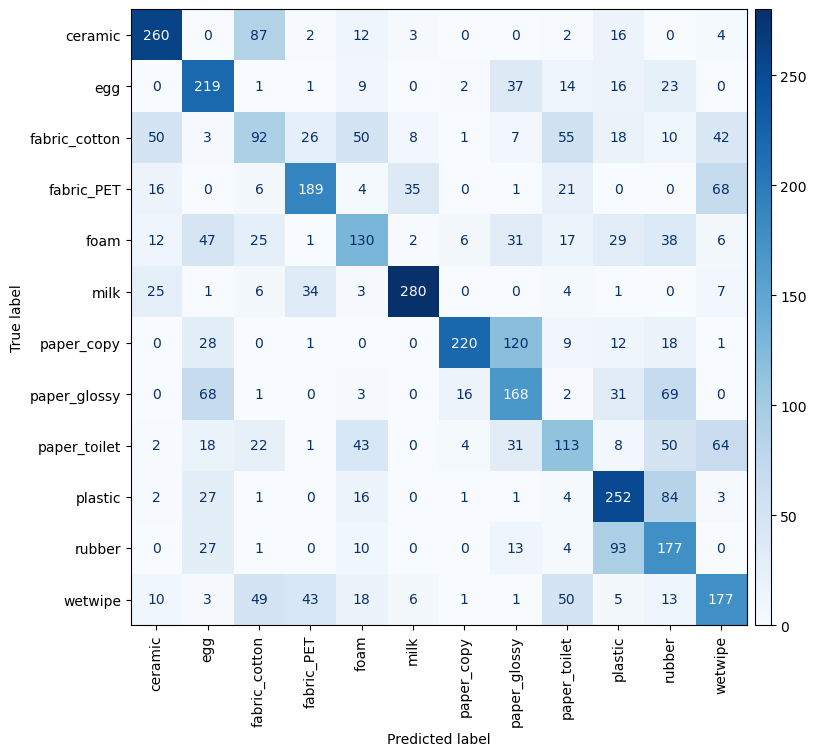

In [41]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

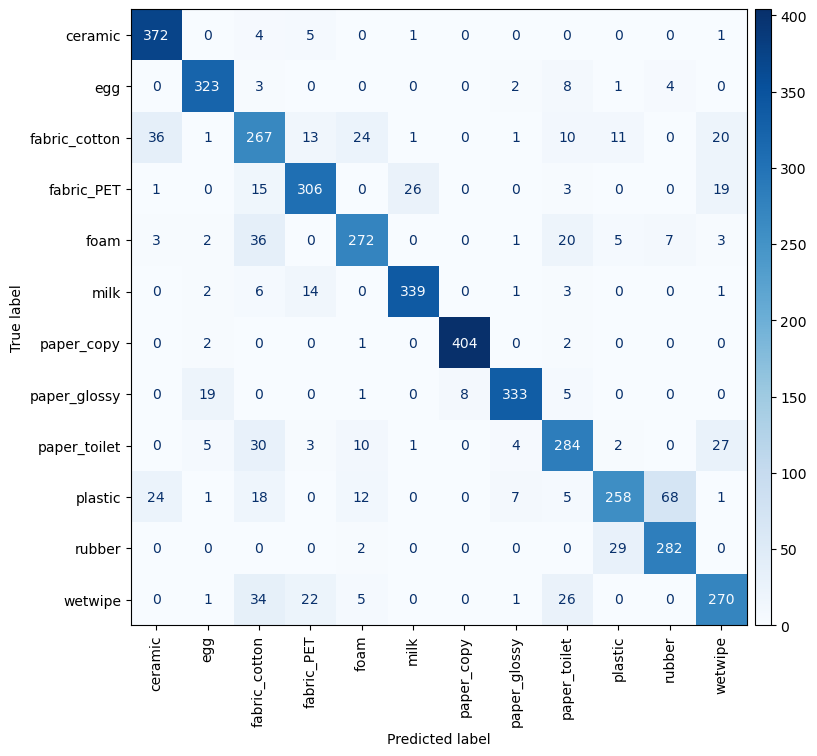

In [ ]:
cm = sum(SVM_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

# Linear SVM plot

## Train on whole scan 1 and test on whole scan2

In [29]:
import numpy as np

# Prepare training dataset
train_data = [data_ceramic_list[0:5], data_egg_list[0:5], data_fabric_cotton_list[0:5], data_fabric_PET_list[0:5],
              data_foam_list[0:5], data_milk_list[0:5], data_paper_copy_list[0:5], data_paper_glossy_list[0:5],
              data_paper_toilet_list[0:5], data_plastic_list[0:5], data_rubber_list[0:5], data_wetwipe_list[0:5]]
X_train = np.concatenate([np.concatenate(data) for data in train_data])

# Prepare testing dataset
test_data = [data_ceramic_list[5:], data_egg_list[5:], data_fabric_cotton_list[5:], data_fabric_PET_list[5:],
             data_foam_list[5:], data_milk_list[5:], data_paper_copy_list[5:], data_paper_glossy_list[5:],
             data_paper_toilet_list[5:], data_plastic_list[5:], data_rubber_list[5:], data_wetwipe_list[5:]]
X_test = np.concatenate([np.concatenate(data) for data in test_data])

# Prepare training labels
train_labels = [np.full(sum([arr.shape[0] for arr in data]), i) for i, data in enumerate(train_data)]
y_train = np.concatenate(train_labels)

# Prepare testing labels
test_labels = [np.full(sum([arr.shape[0] for arr in data]), i) for i, data in enumerate(test_data)]
y_test = np.concatenate(test_labels)


In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4400, 2400)
(4400,)
(4330, 2400)
(4330,)


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import NuSVC, SVC

# Create the SVM classifier with an RBF kernel and 'nu' parameter set to 0.5
clf = SVC(kernel='linear', C=0.5) # Large C = less regularization (overfitting)

SVM_accuracy_list = []
SVM_cm_list = []

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Perform classification on the test data
predictions = clf.predict(X_test)
# Measure the accuracy on the test data
accuracy = accuracy_score(y_test, predictions)
SVM_accuracy_list.append(accuracy)
# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)
SVM_cm_list.append(cm)


In [9]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.7658198614318706


[0.7658198614318706]

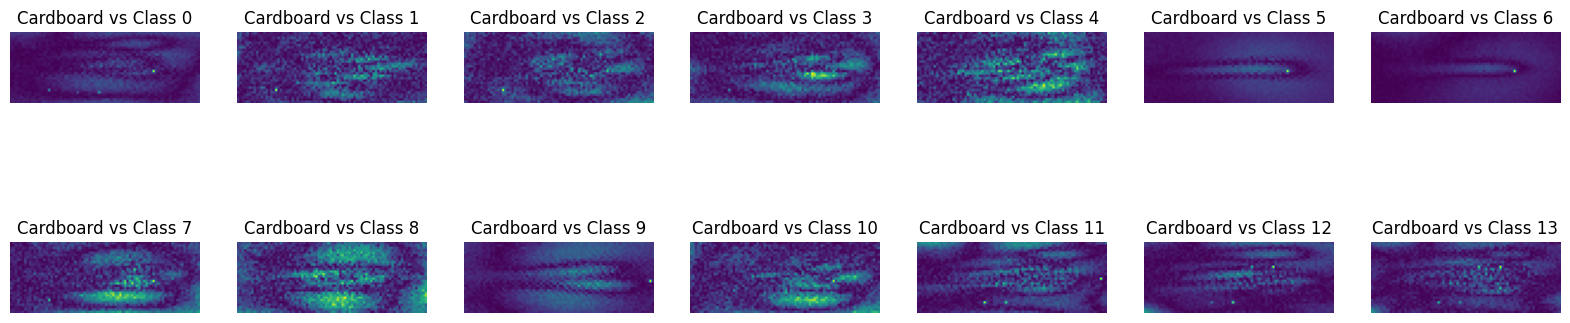

In [12]:
# Get the normal vector of the hyperplane
w = clf.coef_
b = clf.intercept_

# Plot the normal vector as 16 separate images
plt.figure(figsize=(20, 5))
for i in range(14):
    normal_vector = w[i].reshape(30, 80)
    plt.subplot(2, 7, i+1)
    plt.imshow(abs(normal_vector))
    plt.title("Cardboard vs Class {}".format(i))
    plt.axis("off")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the normal vector of the hyperplane
w = clf.coef_
b = clf.intercept_

# Plot the normal vector as 16 separate images
plt.figure(figsize=(20, 5))

for i in range(14):
    normal_vector = w[i].reshape(30, 80)
    plt.subplot(2, 7, i+1)
    plt.imshow(abs(normal_vector))
    plt.title("Cardboard vs Class {}".format(i))
    plt.axis("off")

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)

plt.show()


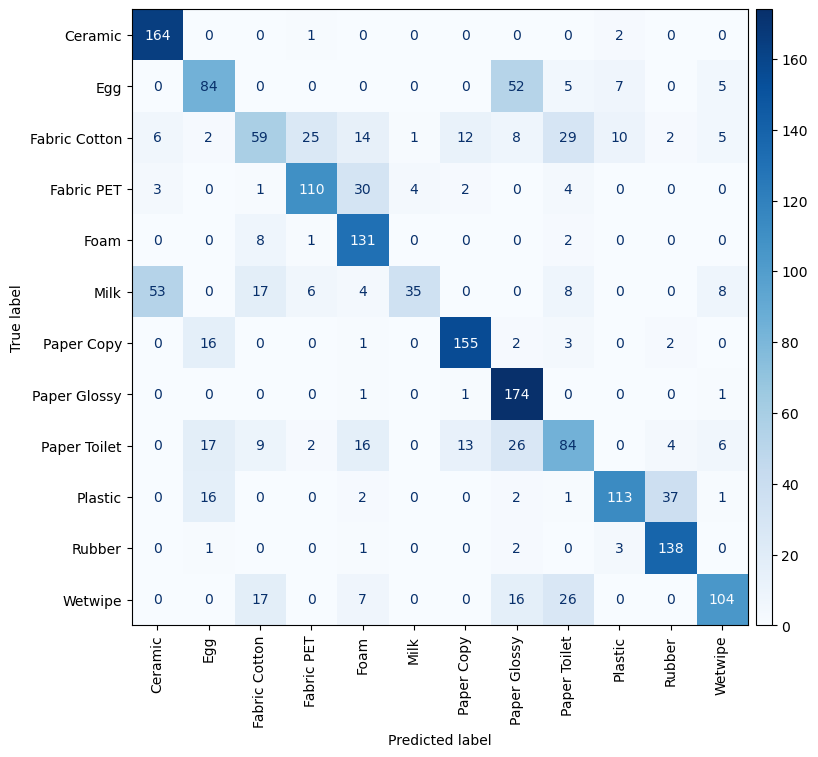

In [ ]:
cm = sum(LDA_cm_list)
# Plot the confusion matrix
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)

fig, ax = plt.subplots(figsize=(8,8))
cm_display.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', colorbar=False)

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cm_display.im_,  cax=cax)
plt.show()

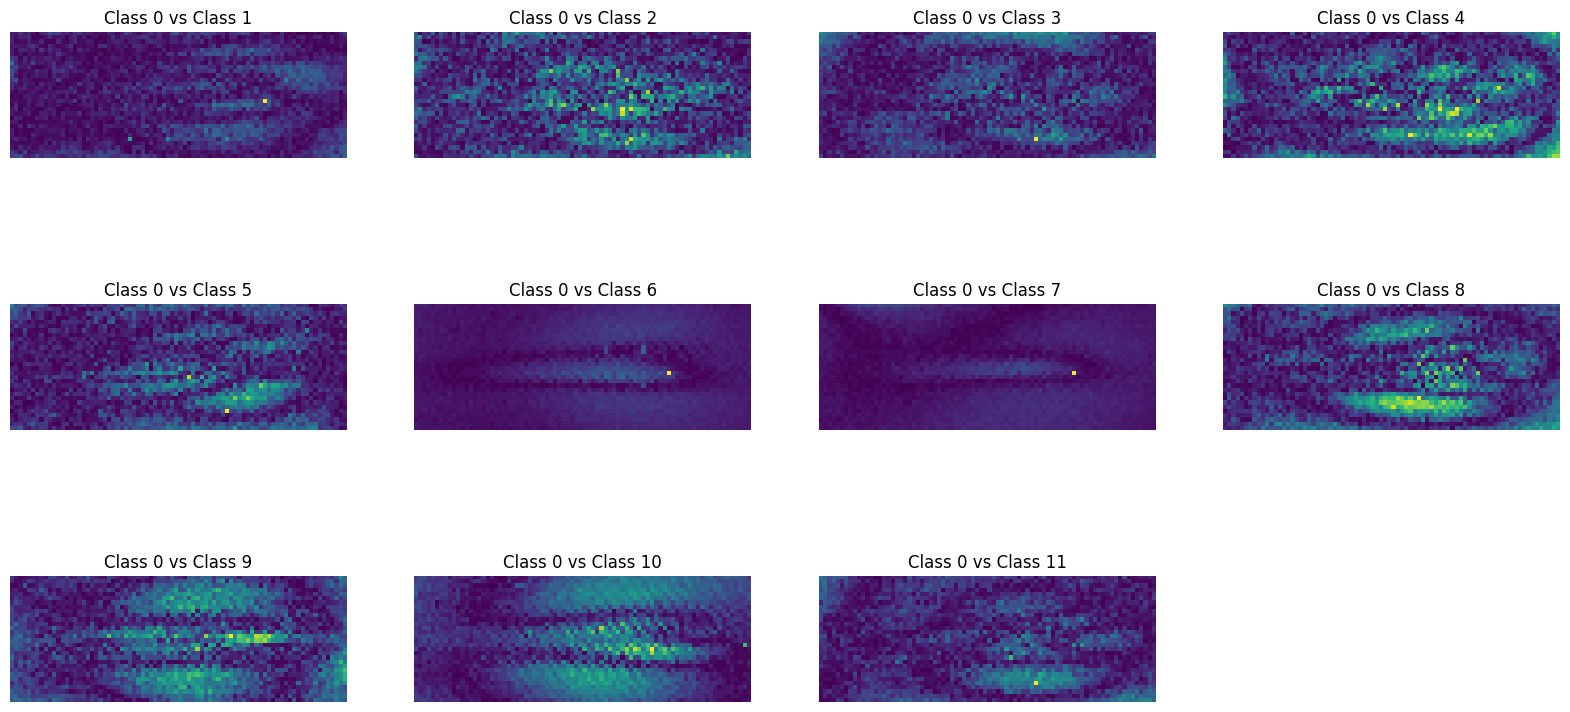

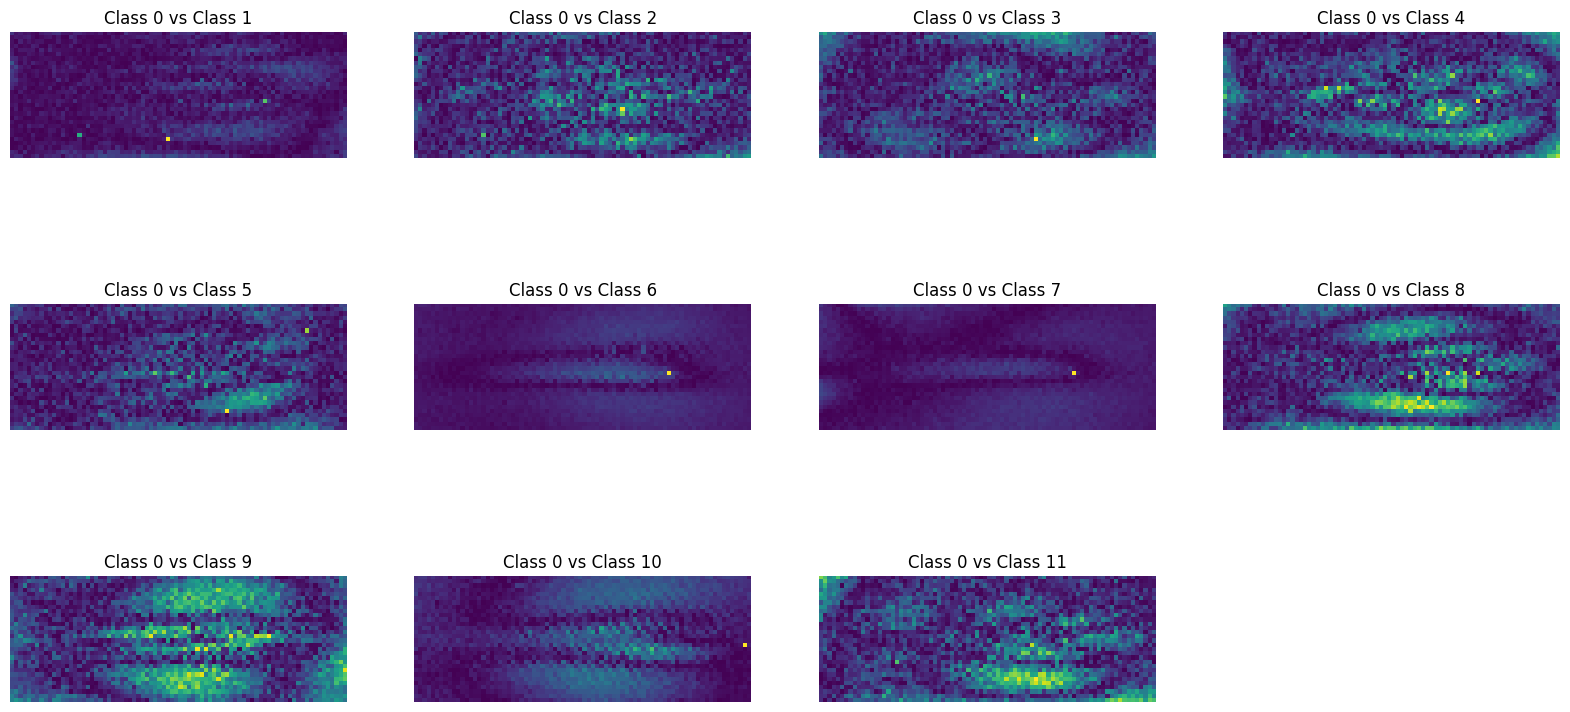

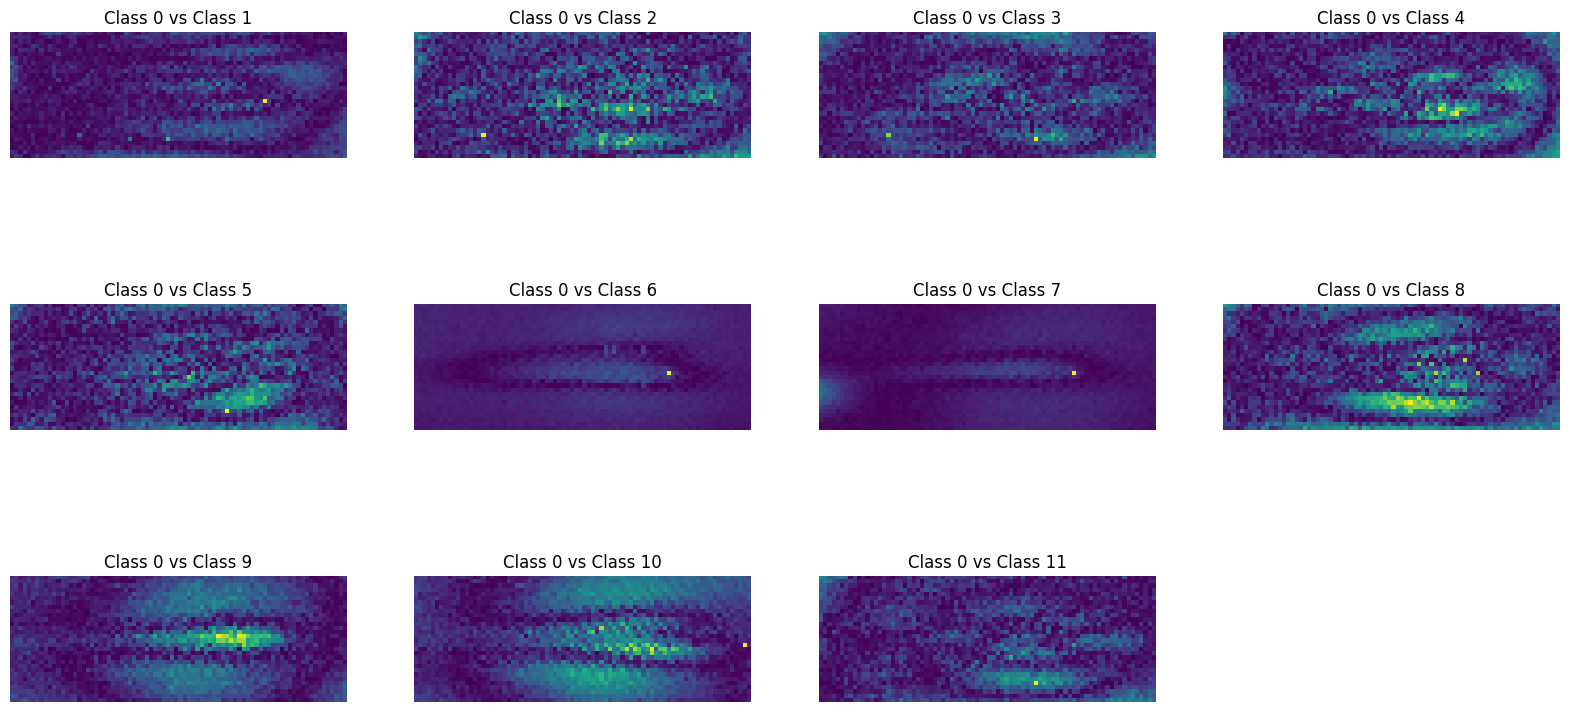

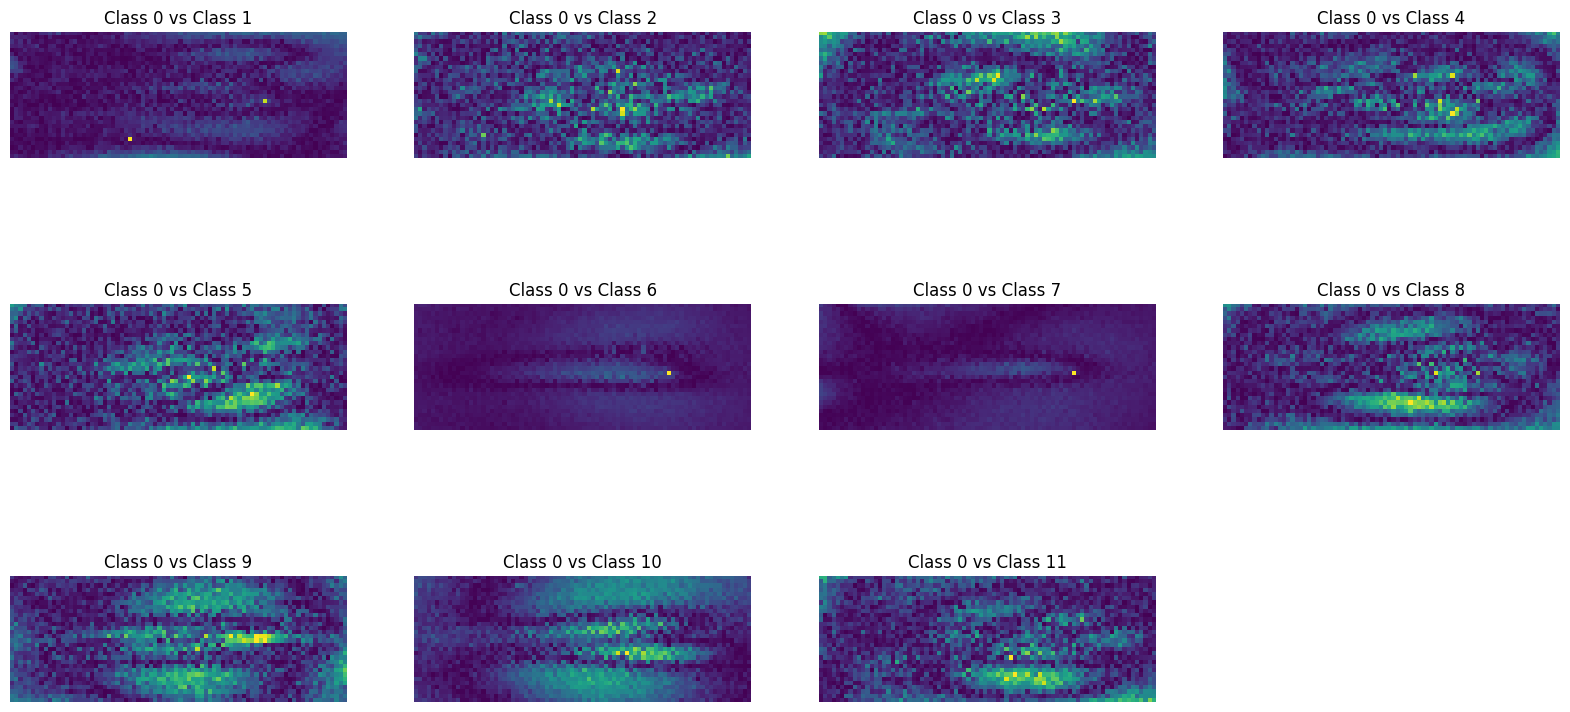

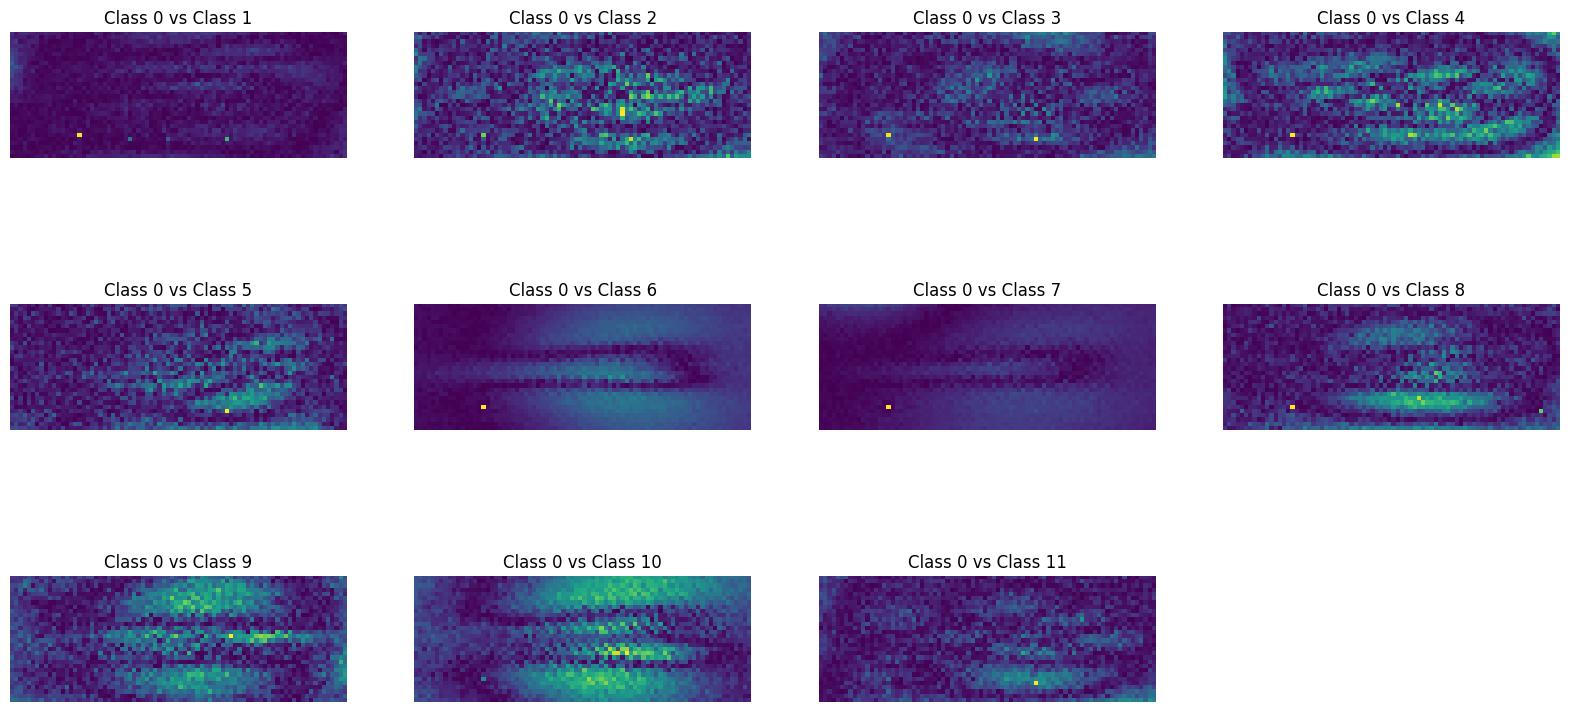

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Create the linear SVM classifier
clf = SVC(kernel='linear', C=0.5)

LDA_accuracy_list = []
LDA_cm_list = []
SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [data_ceramic_list, data_egg_list, data_fabric_cotton_list, data_fabric_PET_list,
                    data_foam_list, data_milk_list, data_paper_copy_list, data_paper_glossy_list,
                    data_paper_toilet_list, data_plastic_list, data_rubber_list, data_wetwipe_list]

for i in range(5):
    # ... (previous code)
    test_indices = [i, i + 5]
    train_indices = [j for j in range(10) if j not in test_indices]

    X_test = np.concatenate([data_list[idx] for data_list in class_data_lists for idx in test_indices])
    y_test = np.concatenate([np.full(data_list[idx].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists) for idx in test_indices])

    X_train_list = []
    y_train_list = []

    for class_idx, data_list in enumerate(class_data_lists):
        rest_data = np.vstack([data_list[idx] for idx in train_indices])
        X_train_list.append(rest_data)
        y_train_list.append(np.full(rest_data.shape[0], class_idx))

    X_train = np.concatenate(X_train_list)
    y_train = np.concatenate(y_train_list)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)

    # Plot the normal vector as separate images
    plt.figure(figsize=(20, 10))
    num_classes = len(class_names)
    w = clf.coef_
    for i in range(num_classes - 1):
        normal_vector = w[i].reshape(30, 80)
        plt.subplot(3, 4, i + 1)
        plt.imshow(abs(normal_vector))
        plt.title(f"Class 0 vs Class {i + 1}")
        plt.axis("off")

    plt.show()


In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Create the linear SVM classifier
clf = SVC(kernel='linear', C=0.5)

SVM_accuracy_list = []
SVM_cm_list = []

class_names = ['ceramic', 'egg', 'fabric_cotton', 'fabric_PET', 'foam', 'milk', 'paper_copy', 'paper_glossy', 'paper_toilet', 'plastic', 'rubber', 'wetwipe']
class_data_lists = [data_ceramic_list, data_egg_list, data_fabric_cotton_list, data_fabric_PET_list,
                    data_foam_list, data_milk_list, data_paper_copy_list, data_paper_glossy_list,
                    data_paper_toilet_list, data_plastic_list, data_rubber_list, data_wetwipe_list]
num_classes = len(class_names)

# Initialize a dictionary to store the sum of the absolute normal vectors for each class pair
normal_vector_sum = {}

for pair in combinations(range(num_classes), 2):
    normal_vector_sum[pair] = np.zeros((30, 80))


for i in range(5):
    # ... (previous code)
    test_indices = [i, i + 5]
    train_indices = [j for j in range(10) if j not in test_indices]

    X_test = np.concatenate([data_list[idx] for data_list in class_data_lists for idx in test_indices])
    y_test = np.concatenate([np.full(data_list[idx].shape[0], class_idx) for class_idx, data_list in enumerate(class_data_lists) for idx in test_indices])

    X_train_list = []
    y_train_list = []

    for class_idx, data_list in enumerate(class_data_lists):
        rest_data = np.vstack([data_list[idx] for idx in train_indices])
        X_train_list.append(rest_data)
        y_train_list.append(np.full(rest_data.shape[0], class_idx))

    X_train = np.concatenate(X_train_list)
    y_train = np.concatenate(y_train_list)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Perform classification on the test data
    predictions = clf.predict(X_test)
    # Measure the accuracy on the test data
    accuracy = accuracy_score(y_test, predictions)
    SVM_accuracy_list.append(accuracy)
    # Create the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    SVM_cm_list.append(cm)

    # Add the absolute values of the normal vectors to the sum for each class pair
    w = clf.coef_
    for j, pair in enumerate(combinations(range(num_classes), 2)):
        normal_vector = w[j].reshape(30, 80)
        normal_vector_sum[pair] += np.abs(normal_vector)

# Calculate the average of the absolute normal vectors
# normal_vector_avg = normal_vector_sum / 5

# Calculate the average of the absolute normal vectors for each class pair
normal_vector_avg = {pair: normal_vector_sum[pair] / 5 for pair in normal_vector_sum}



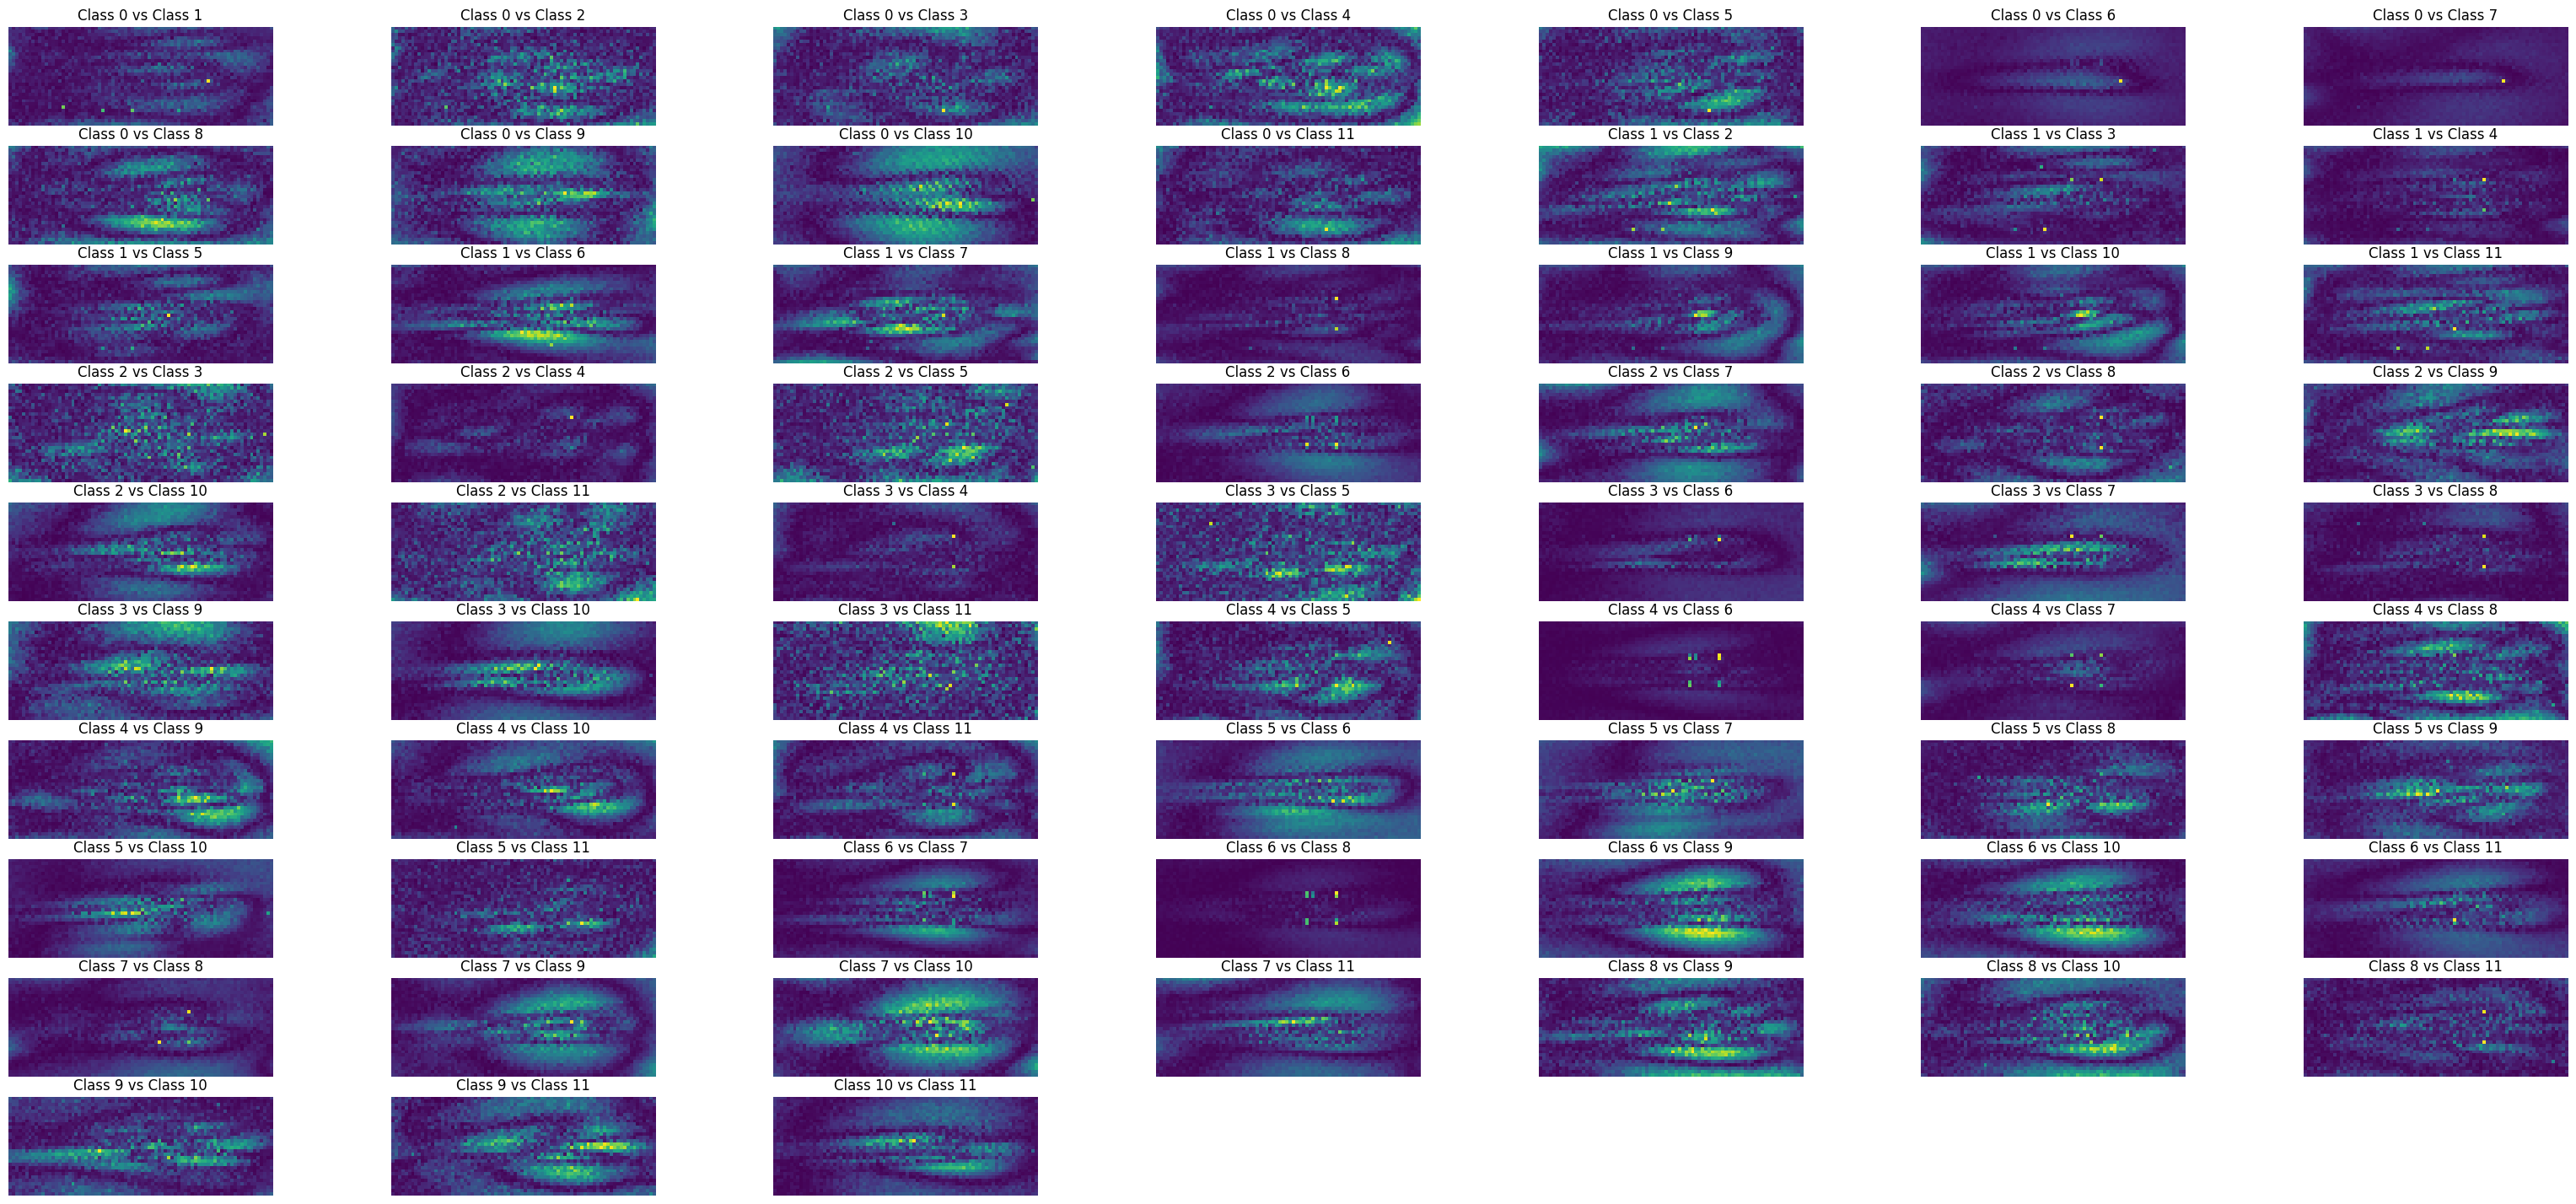

In [52]:
# Plot the average absolute normal vectors as separate images
num_pairs = len(normal_vector_avg)
rows = 10
cols = (num_pairs + rows - 1) // rows
plt.figure(figsize=(40, 18))

for i, (pair, normal_vector) in enumerate(normal_vector_avg.items()):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(normal_vector)
    plt.title(f"Class {pair[0]} vs Class {pair[1]}")
    plt.axis("off")

plt.show()

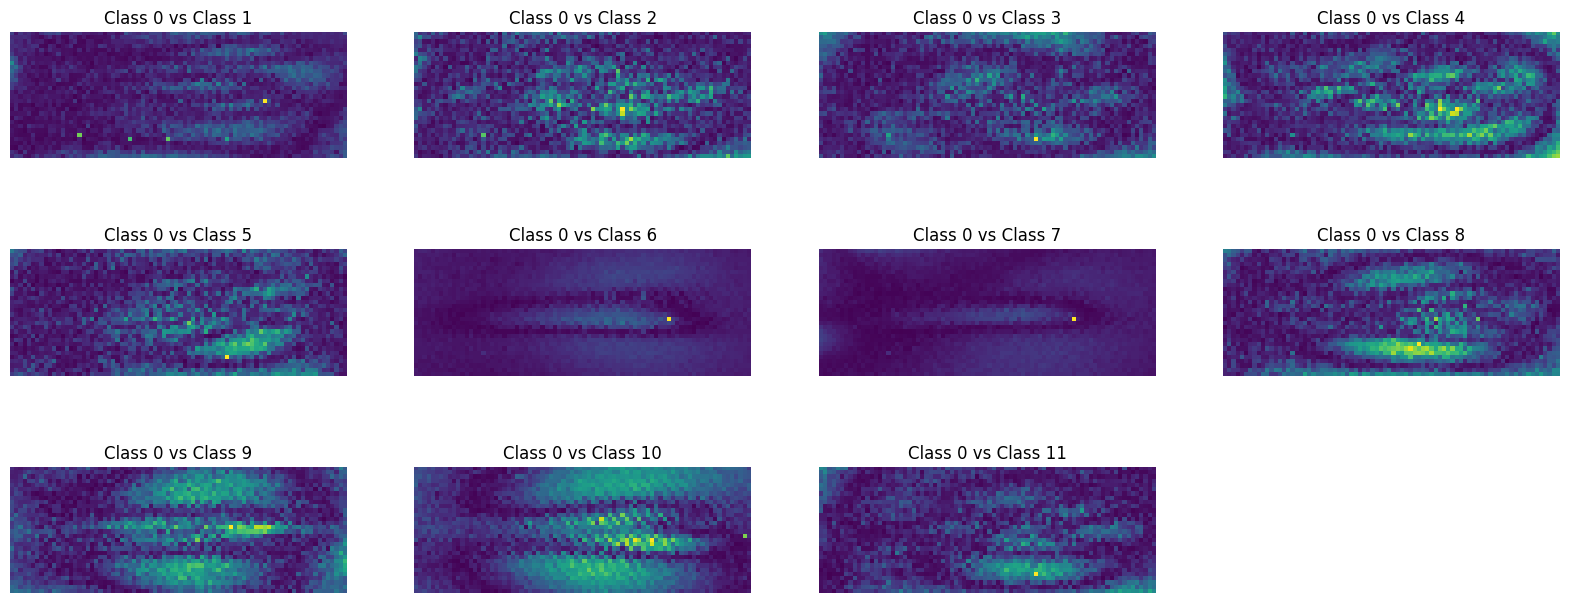

In [40]:
# Plot the average absolute normal vectors as separate images
plt.figure(figsize=(20, 8))
for i in range(num_classes - 1):
    plt.subplot(3, 4, i + 1)
    plt.imshow(normal_vector_avg[i])
    plt.title(f"Class 0 vs Class {i + 1}")
    plt.axis("off")

# Adjust the spacing between subplots
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.05, top=0.1, wspace=0.2, hspace=0.2)
plt.show()

In [16]:
print("SVM accuracy: ", np.mean(SVM_accuracy_list))
SVM_accuracy_list

SVM accuracy:  0.7783971777099715


[0.8,
 0.8445229681978799,
 0.7327485380116959,
 0.770940170940171,
 0.7437742114001107]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the normal vector of the hyperplane
w = clf.coef_
b = clf.intercept_

# Plot the normal vector as 16 separate images
plt.figure(figsize=(20, 5))

for i in range(14):
    normal_vector = w[i].reshape(30, 80)
    plt.subplot(2, 7, i+1)
    plt.imshow(abs(normal_vector))
    plt.title("Cardboard vs Class {}".format(i))
    plt.axis("off")

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.2)

plt.show()
